<a href="https://colab.research.google.com/github/FacuNieto/Clase-IA_2024_FCEFyN/blob/main/Clase_IA_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ Ejemplo

Una pequeña farmacéutica produce una nueva y exitosa medicación cuya composición se basa principalmente en componentes de origen vegetal.
Debido al aumento de ventas de este medicamento el fabricante decide mejorar el proceso para que sea más rápido y eficiente maximizando el volumen de fabricación. El área de procesos determinó que uno de los cuellos de botella se encuentra en la clasificación humana de los componentes vegetales debido a que las plantas utilizadas tienen características visuales muy similares, y deben ser clasificadas por un empleado experimentado.

Los componentes vegetales consisten de 3 tipos de flores diferentes:

El área de investigación y desarrollo desarrolló un sistema de visión artificial capaz de calcular:


*  El largo y el ancho del pétalo.
*  El largo y el ancho del sépalo.





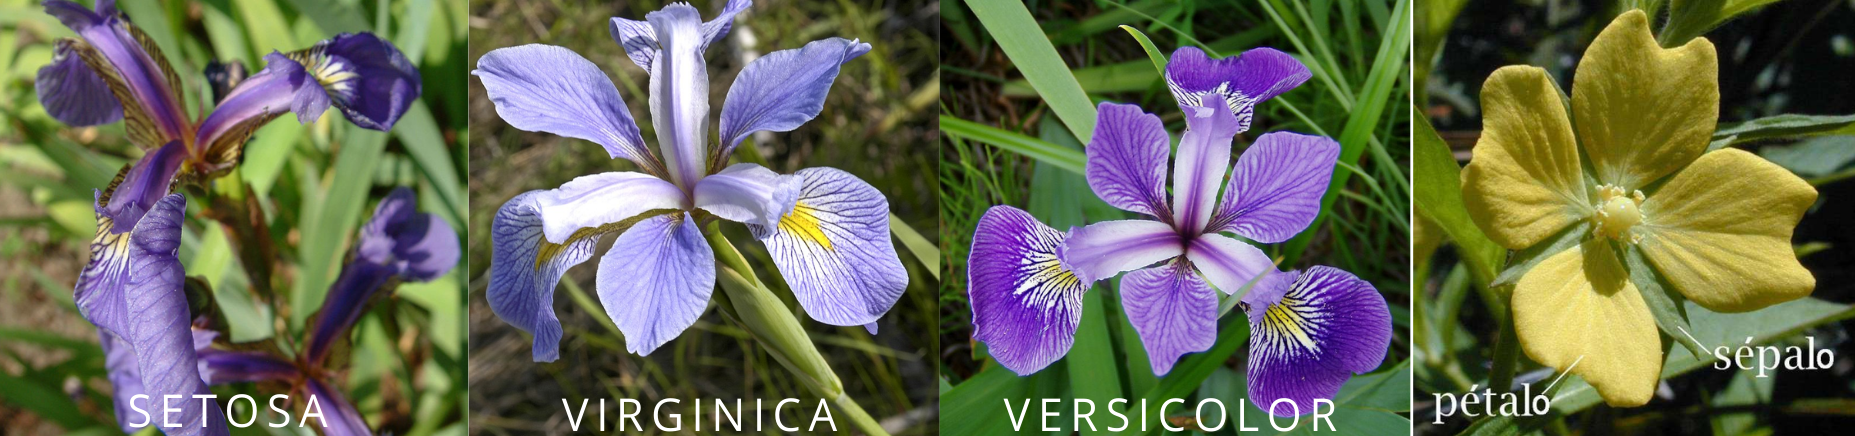

##🔶1.1 Carga de librerías

In [ ]:
# Importamos librerias numpy, pandas y matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos dataset
from sklearn.datasets import load_iris

# Importamos algoritmo árbol de decisión y la herramienta para plotear el árbol
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report

##🔶1.2 Carga, analisis y visualización de dataset.

### 1.2.1 Carga de dataset

In [ ]:
# Cargamos el dataset
iris = load_iris()

In [ ]:
# Visualizamos en un dataframe
iris_df= pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
display(iris_df)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
# Concatenamos la información de data con target
iris_df_c=pd.DataFrame(data= np.c_[iris.data , iris.target], columns= iris['feature_names'] + ['target'])
display(iris_df_c)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

In [ ]:
# Verificar nulls
iris_df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### 1.2.2 Visualización

In [ ]:
target_n = []
for i in range(len(iris['target'])):
  target_n.append(iris['target_names'][iris['target'][i]])

In [ ]:
iris_df_graph = iris_df_c.copy()

In [ ]:
iris_df_graph['target_graph'] = pd.DataFrame(target_n)

In [ ]:
iris_df_graph = iris_df_graph.drop('target', axis=1)

In [ ]:
iris_df_graph

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

    target_graph  
0         setosa  
1         setosa  
2         setosa  
3         setosa  
4         setosa  
..           ...  
145    virginica  
146    virginica  
147    virginica  
148    virginica  
149    virginica  

[150 rows x 5 columns]

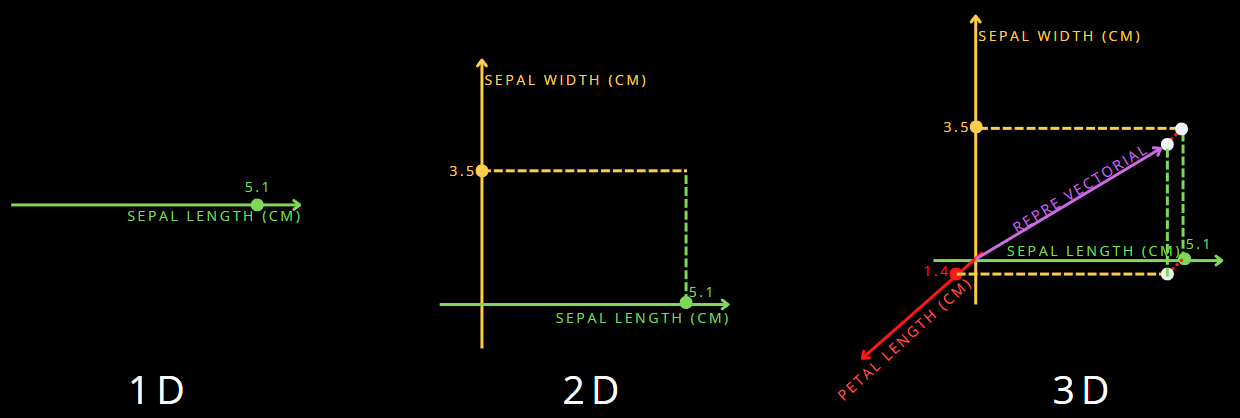

!["asdf"](https://raw.githubusercontent.com/FacuNieto/AP_4.0_Arboles/main/AP_4.0_PC.gif)


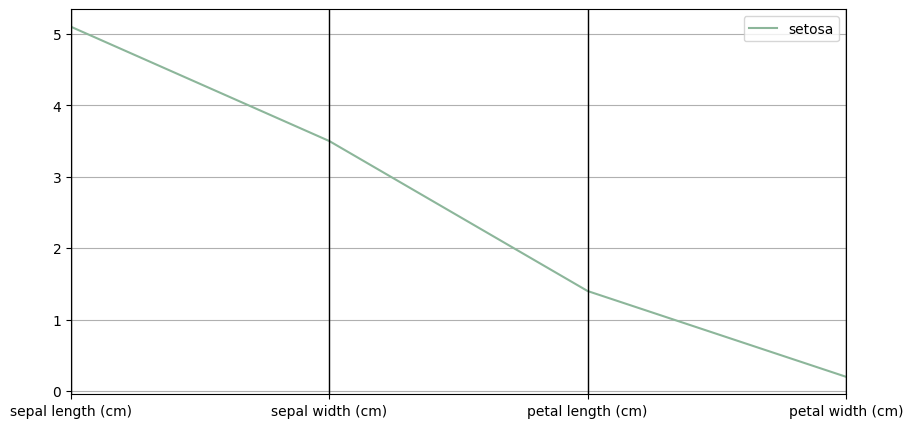

In [ ]:
#@title Coord paralelas
variable_name = 1 #@param {type:"slider", min:1, max:149, step:1}
# Generamos un gráfico de coordenadas paralelas.
plt.rcParams["figure.dpi"] = 100
fig = plt.figure(figsize = (10, 5))
pd.plotting.parallel_coordinates(iris_df_graph[:variable_name],'target_graph')
plt.show()

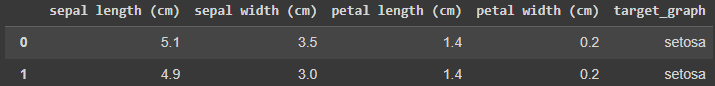

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(iris_df_c, color='target',
                              dimensions=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=1)
fig.show()

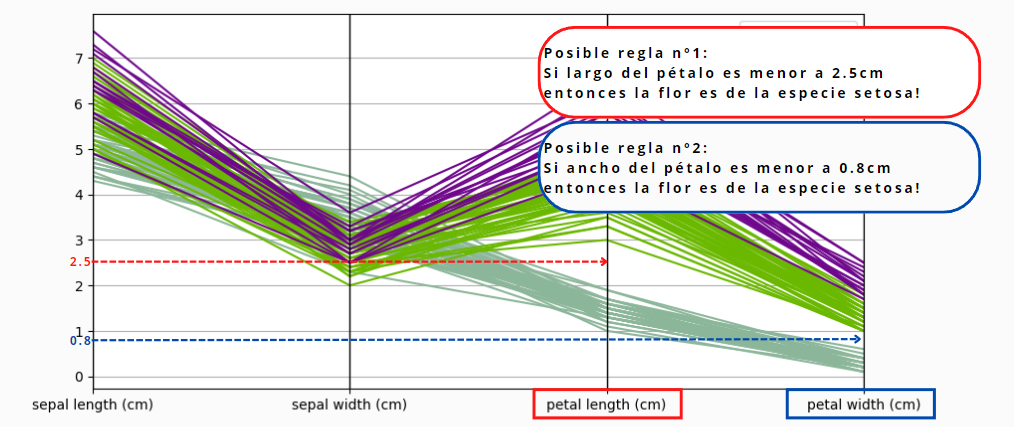

##🔶1.3 Generación de datos de entrenamiento y prueba

In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba

x= iris_df_c.drop('target', axis = 1)
y= iris_df_c['target']
x_train, x_test ,y_train, y_test = train_test_split( x , y , random_state=3)

##🔶1.4 Carga y entrenamiento de modelo

In [ ]:
# Entrenamos:
clf = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)

# Hacemos la predicción:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))
print('precision = ' , precision_score(y_test,y_pred,average='macro'))

accuracy = 0.9473684210526315
precision =  0.9419191919191919


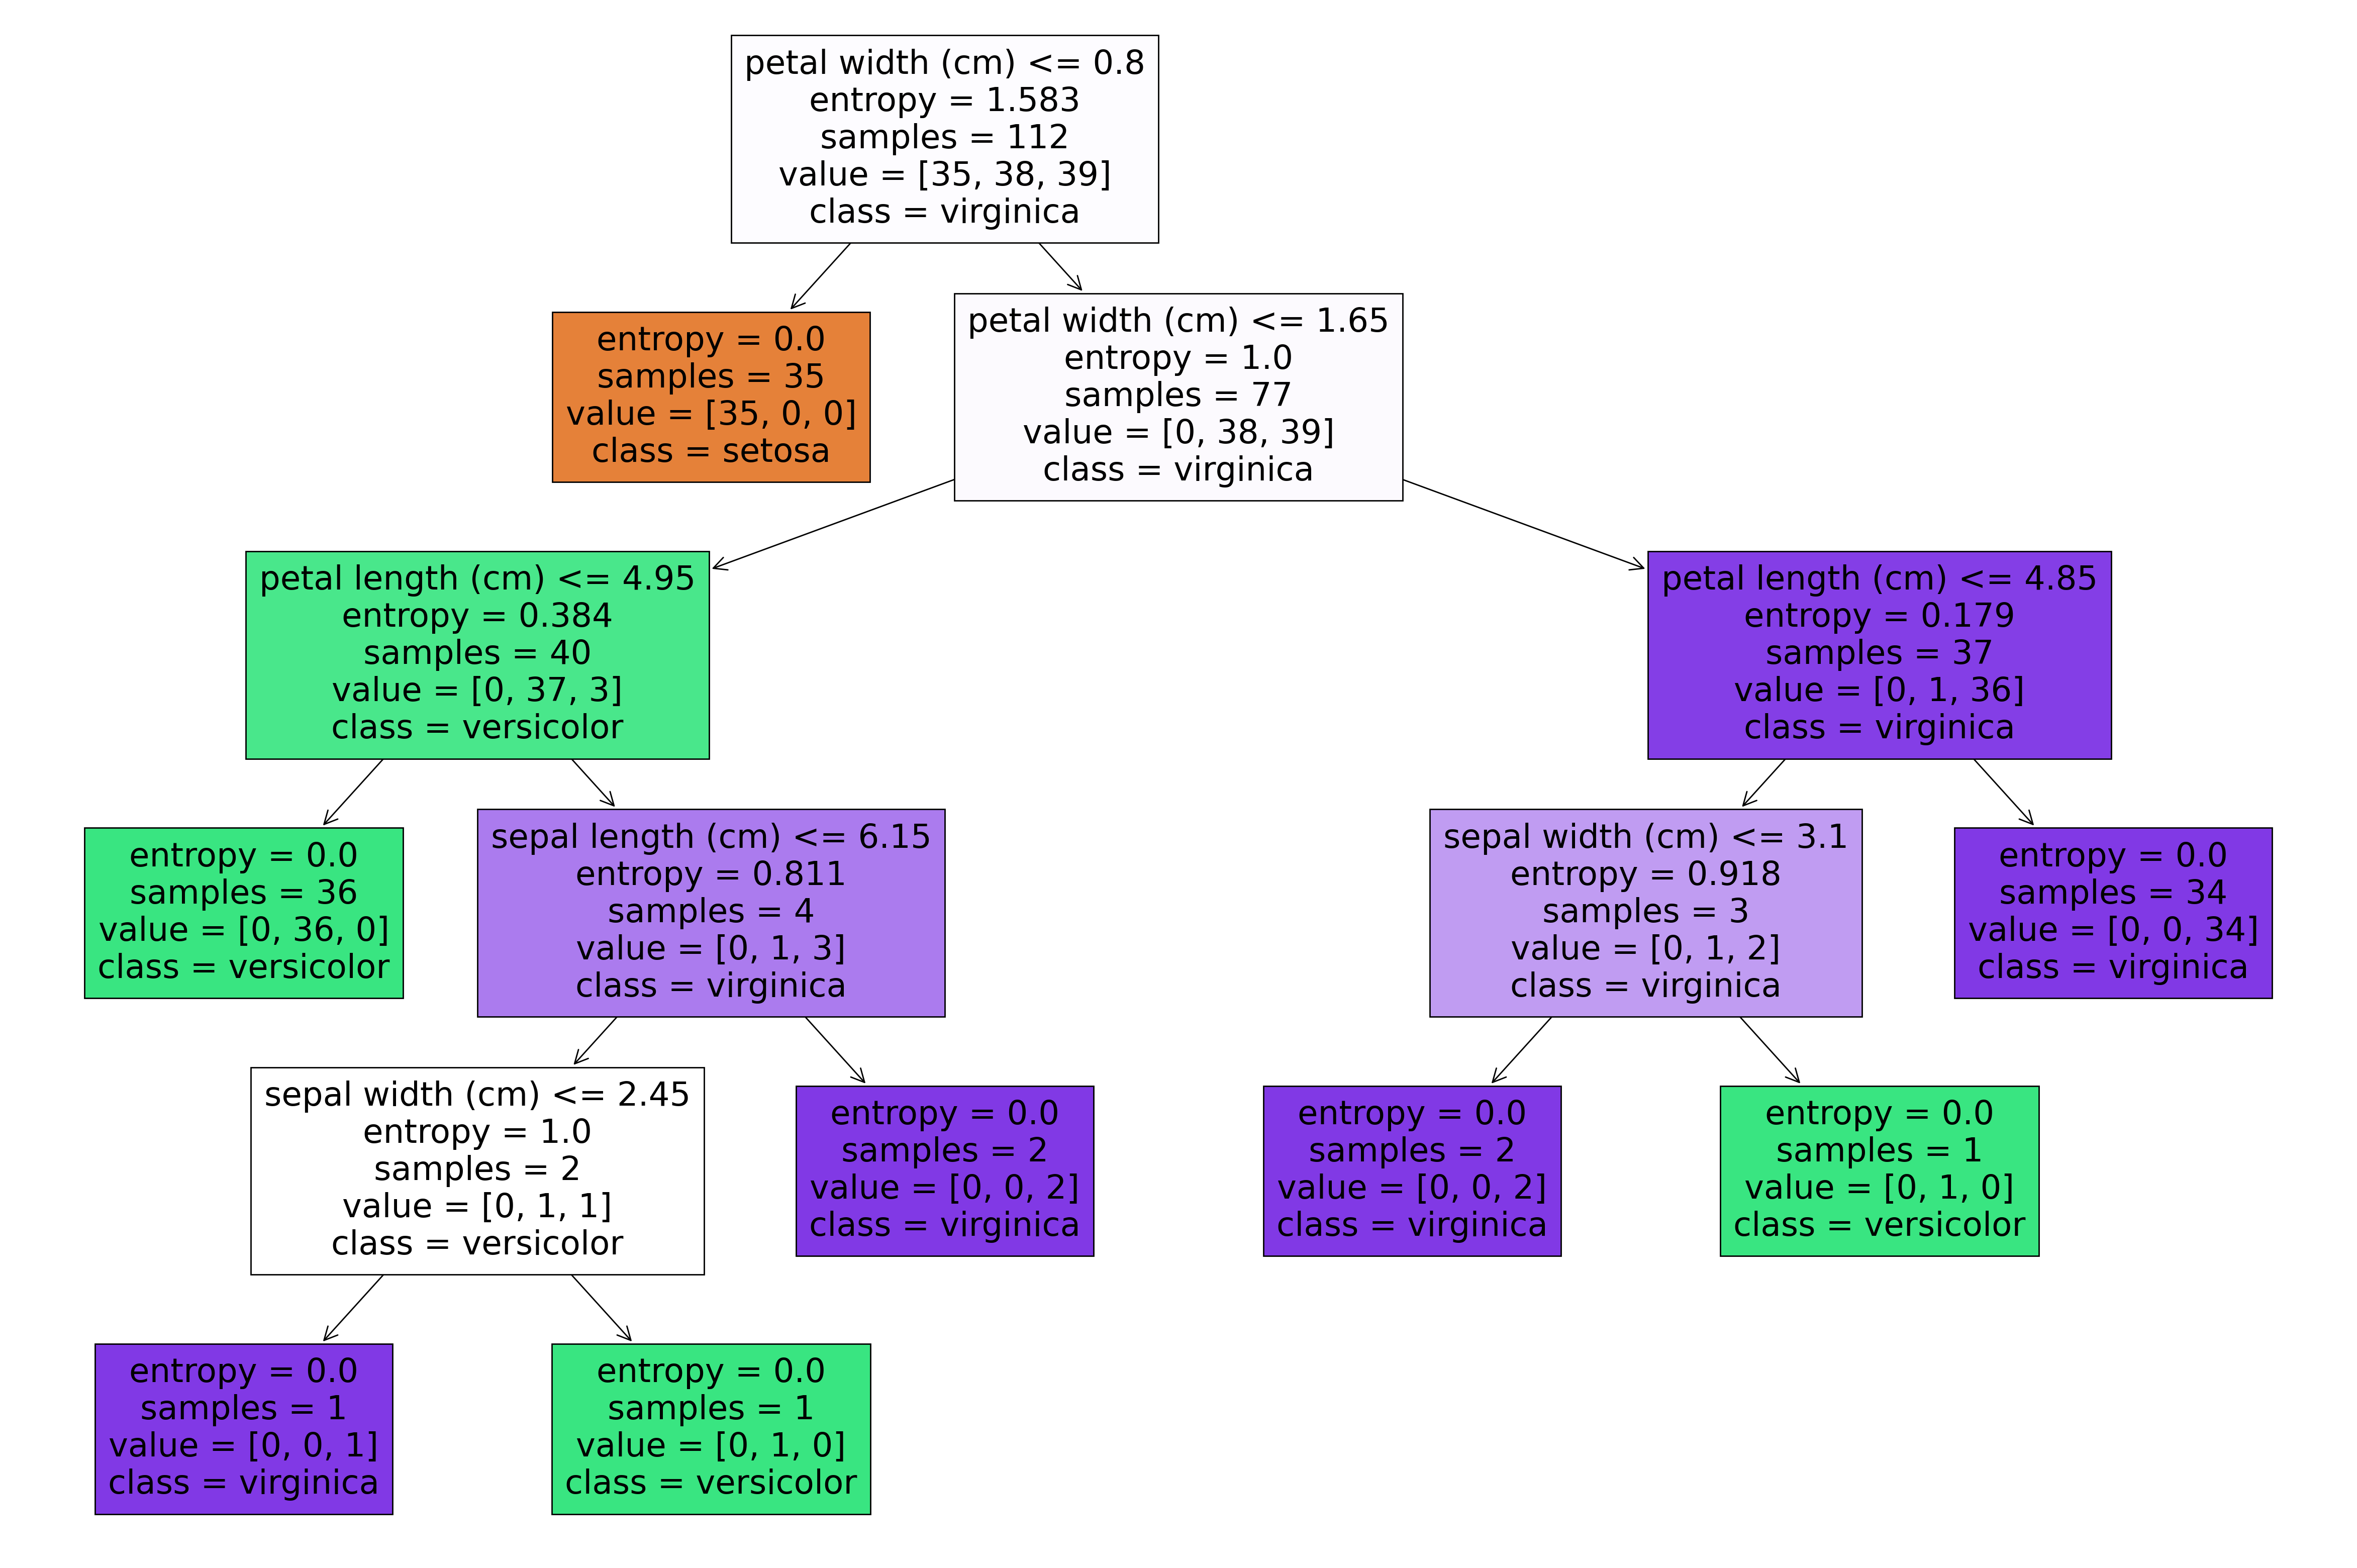

In [ ]:
# Graficamos árbol de decisión.
plt.rcParams["figure.dpi"] = 200
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, class_names = iris.target_names, feature_names = iris.feature_names)
# plt.savefig('arbol.png')
plt.show()

# 2️⃣Ejemplo

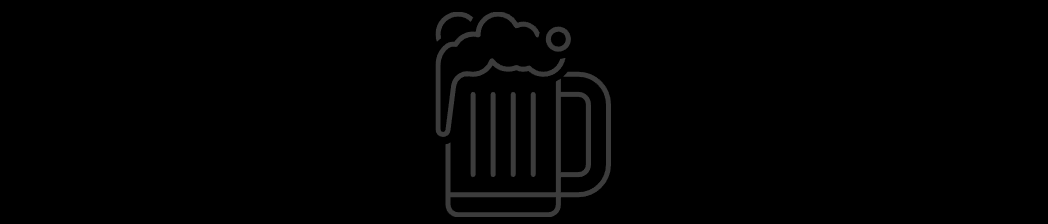

🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺

Usted se junta con sus amistades, y sucede que uno de sus invitados trae una cerveza que a usted le gustó mucho, por lo que decide conocer el estilo de cerveza. Sin embargo, al revisar la etiqueta, lamentablemente el mismo no aparece, pero sí cuenta con información de la cerveza. Su misión es crear un modelo que le permita clasificar el estilo de cerveza basado en la información que obtiene en la etiqueta.

En este caso, usted cuenta con:

* Contenido de Alcohol por Volumen (ABV)
* Unidades Internacionales de Amargura (min y max)
* Astringencia
* Lupulado
* Malta

Durante su investigación **casualmente** encuentra un dataset en Kaggle con distintos tipos de cerveza!
https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set

🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺🍺


##🔶2.1 Clonamos repositorio y leemos dataset

In [ ]:
!git clone https://github.com/FacuNieto/AP_4.0_Arboles.git

Cloning into 'AP_4.0_Arboles'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 17.94 MiB | 9.94 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
df_beer = pd.read_csv('/content/AP_4.0_Arboles/beer_data_raw.csv', delimiter=';')

In [ ]:
df_beer

Nombre                      Estilo  \
0                    Honker's Ale            Bitter - English   
1           Fuller's London Pride            Bitter - English   
2                 Bluebird Bitter            Bitter - English   
3    Spitfire Premium Kentish Ale            Bitter - English   
4        Younger's Special Bitter            Bitter - English   
..                            ...                         ...   
730            Saranac Summer Ale  Wheat Beer - American Pale   
731                     Sun Block  Wheat Beer - American Pale   
732   Funk Blueberry Citrus Wheat  Wheat Beer - American Pale   
733                 Willy Vanilly  Wheat Beer - American Pale   
734                     Canebrake  Wheat Beer - American Pale   

                       Cervecería  \
0           Goose Island Beer Co.   
1       Fuller Smith & Turner PLC   
2        Coniston Brewing Co. Ltd   
3              Shepherd Neame Ltd   
4                      Rogue Ales   
..                            ...   
730          Matt Brewing Company   
731  Captain Lawrence Brewing Co.   
732        DuClaw Brewing Company   
733           Alpine Beer Company   
734        Parish Brewing Company   

                                      Nombre completo  \
0                  Goose Island Beer Co. Honker's Ale   
1     Fuller Smith & Turner PLC Fuller's London Pride   
2            Coniston Brewing Co. Ltd Bluebird Bitter   
3    Shepherd Neame Ltd Spitfire (Premium Ale Export)   
4                 Rogue Ales Younger's Special Bitter   
..                                                ...   
730           Matt Brewing Company Saranac Summer Ale   
731      Captain Lawrence Brewing Co. Sun Block Witte   
732                       DuClaw Brewing Company Funk   
733                 Alpine Beer Company Willy Vanilly   
734                  Parish Brewing Company Canebrake   

                                           Descripción  ABV  Min IBU  Max IBU  \
0    Notes:Golden sunset color, fruity hop aroma, b...  4.3    200.0     35.0   
1    Notes:Not just the iconic ale of the capital, ...  4.7     20.0     35.0   
2    Notes:Bluebird is a fine session ale with a li...  NaN      NaN     35.0   
3    Notes:This 4.2% Kentish ale (bottle 4.5%) was ...  4.5     20.0     35.0   
4                                               Notes:  4.8     20.0      NaN   
..                                                 ...  ...      ...      ...   
730  Notes:Available in the 12 Beers of Summer samp...  4.7     10.0     35.0   
731  Notes:As the sun starts to peek out from aroun...  4.5     10.0     35.0   
732  Notes:The traditional American Wheat Ale serve...  5.0     10.0     35.0   
733  Notes:The base for this beer is Willy Wheat. T...  5.5     10.0     35.0   
734  Notes:Canebrake is crisp and smooth with a bea...  5.5     10.0     35.0   

     Astringencia  Cuerpo (Body)  Alcohol  Amargo (Bitter)  Dulce (Sweet)  \
0              14             35      3.0               53             66   
1              21             49      9.0               58             67   
2              29             43     15.0               62             52   
3              16             22      NaN               51             29   
4              20             69     14.0               74             44   
..            ...            ...      ...              ...            ...   
730            19             31      4.0               32             29   
731            28             52     11.0               73             33   
732            18             32     10.0               21            118   
733            17             35     11.0               16             16   
734            21             29      NaN               19             94   

     Agrio (Sour)  Salado (Salty)  Frutas (Fruits)  Lupulado (Hoppy)  \
0              28               1               32              58.0   
1              32               0               33             101.0   
2 

##🔶2.2 Dos caminos

In [ ]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre             735 non-null    object 
 1   Estilo             735 non-null    object 
 2   Cervecería         735 non-null    object 
 3   Nombre completo    735 non-null    object 
 4   Descripción        735 non-null    object 
 5   ABV                684 non-null    float64
 6   Min IBU            685 non-null    float64
 7   Max IBU            685 non-null    float64
 8   Astringencia       735 non-null    int64  
 9   Cuerpo (Body)      735 non-null    int64  
 10  Alcohol            685 non-null    float64
 11  Amargo (Bitter)    735 non-null    int64  
 12  Dulce (Sweet)      735 non-null    int64  
 13  Agrio (Sour)       735 non-null    int64  
 14  Salado (Salty)     735 non-null    int64  
 15  Frutas (Fruits)    735 non-null    int64  
 16  Lupulado (Hoppy)   685 non



---


Eliminar columnas que no se usaran en la inferencia!!!

'ABV', 'Min IBU', 'Max IBU', 'Astringencia', 'Lupulado (Hoppy)', 'Malta (Malty)'



---



In [ ]:
# Eliminamos columnas
columnas_a_eliminar =['Nombre', 'Cervecería', 'Nombre completo', 'Descripción',
                      'Amargo (Bitter)', 'Dulce (Sweet)', 'Agrio (Sour)', 'Salado (Salty)',
                      'Frutas (Fruits)',  'Especias (Spices)', "Cuerpo (Body)", "Alcohol"]
df_beer = df_beer.drop(columns=columnas_a_eliminar)

In [ ]:
# Verificar nulos y tipos de datos
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estilo            735 non-null    object 
 1   ABV               684 non-null    float64
 2   Min IBU           685 non-null    float64
 3   Max IBU           685 non-null    float64
 4   Astringencia      735 non-null    int64  
 5   Lupulado (Hoppy)  685 non-null    float64
 6   Malta (Malty)     685 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 40.3+ KB


In [ ]:
# Obtener los valores únicos de la columna "Estilo"
valores_unicos = df_beer["Estilo"].unique()

print("Valores únicos en la columna 'Estilo':")
for valor in valores_unicos:
    print(f"- {valor}")

print('Cantidad de categorías:', len(valores_unicos))

Valores únicos en la columna 'Estilo':
- Bitter - English
- Blonde Ale - American
- Bock - Traditional
- Brown Ale - American
- Dubbel
- IPA - Imperial
- Kölsch
- Lager - Munich Dunkel
- Lambic - Traditional
- Mild Ale - English Dark
- Old Ale
- Pale Ale - Belgian
- Pilsner - German
- Porter - English
- Pumpkin Beer
- Red Ale - Irish
- Scottish Ale
- Smoked Beer
- Stout - American
- Strong Ale - English
- Tripel
- Wheat Beer - American Pale
Cantidad de categorías: 22


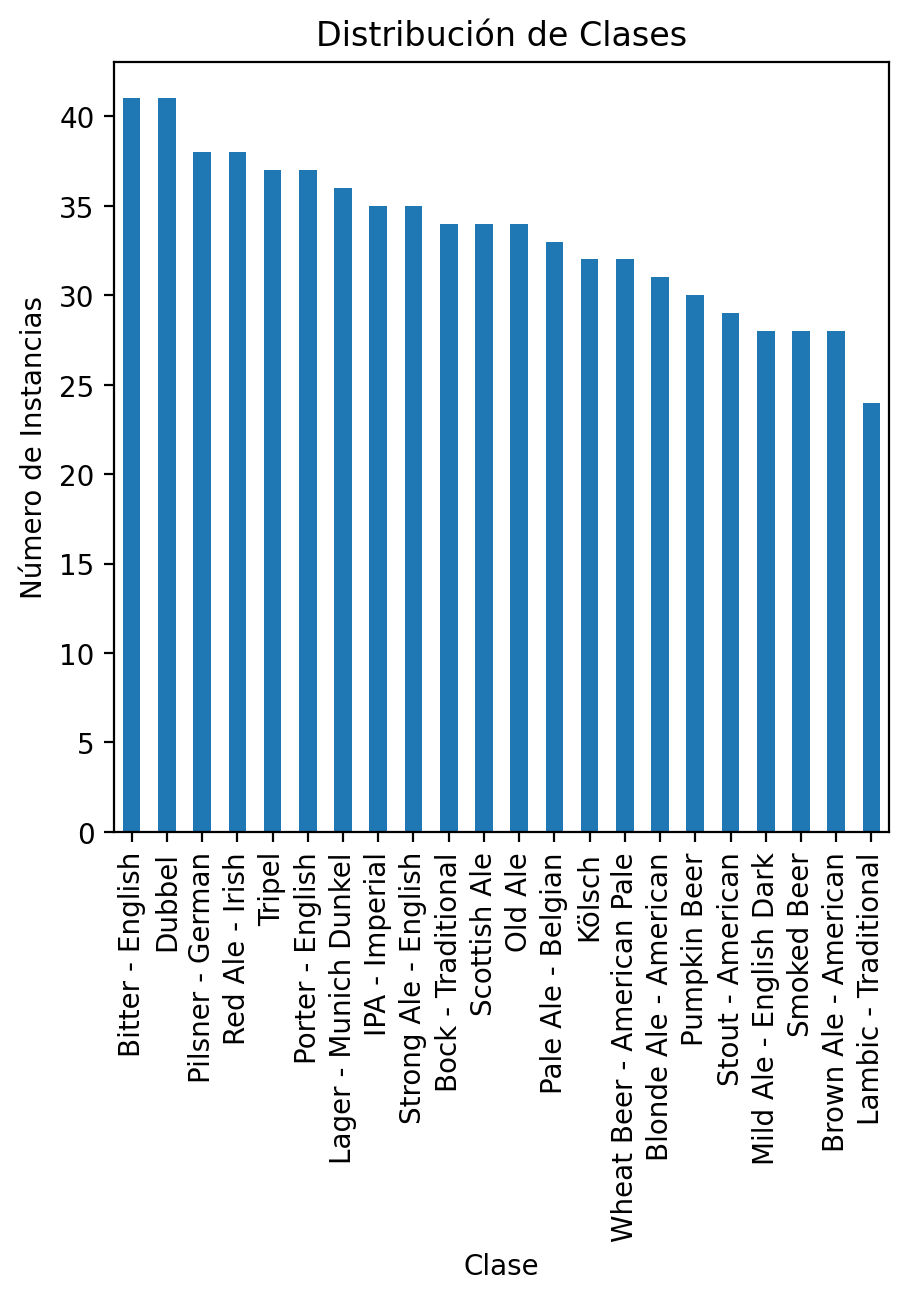

Porcentaje de instancias por clase:
Estilo
Bitter - English              5.578231
Dubbel                        5.578231
Pilsner - German              5.170068
Red Ale - Irish               5.170068
Tripel                        5.034014
Porter - English              5.034014
Lager - Munich Dunkel         4.897959
IPA - Imperial                4.761905
Strong Ale - English          4.761905
Bock - Traditional            4.625850
Scottish Ale                  4.625850
Old Ale                       4.625850
Pale Ale - Belgian            4.489796
Kölsch                        4.353741
Wheat Beer - American Pale    4.353741
Blonde Ale - American         4.217687
Pumpkin Beer                  4.081633
Stout - American              3.945578
Mild Ale - English Dark       3.809524
Smoked Beer                   3.809524
Brown Ale - American          3.809524
Lambic - Traditional          3.265306
Name: count, dtype: float64


In [ ]:
# Contar las instancias de cada clase
counts = df_beer["Estilo"].value_counts()

# Visualizar la distribución
plt.figure(figsize=(5, 5))
counts.plot(kind="bar")
plt.title("Distribución de Clases")
plt.xlabel("Clase")
plt.ylabel("Número de Instancias")
plt.show()

# Calcular el porcentaje de cada clase
total_instances = len(df_beer)
class_percentages = counts / total_instances * 100

# Imprimir los porcentajes de cada clase
print("Porcentaje de instancias por clase:")
print(class_percentages)


###🟢2.2.1 Camino simple

#### 2.2.1.1 Limpieza

In [ ]:
print("-----------------------------------------------")
print("🟡 Dataset ANTES de limpieza de valores nulos: ")
print("-----------------------------------------------")

# Check nulos
df_beer.info()

# Eliminar filas con valores nulos
df_beer_sin_nulos = df_beer.dropna()

print("-----------------------------------------------")
print("🟢 Dataset DESPUÉS de limpieza de valores nulos: ")
print("-----------------------------------------------")

# Mostrar información sobre el DataFrame limpio
print(df_beer_sin_nulos.info())

-----------------------------------------------
🟡 Dataset ANTES de limpieza de valores nulos: 
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estilo            735 non-null    object 
 1   ABV               684 non-null    float64
 2   Min IBU           685 non-null    float64
 3   Max IBU           685 non-null    float64
 4   Astringencia      735 non-null    int64  
 5   Lupulado (Hoppy)  685 non-null    float64
 6   Malta (Malty)     685 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 40.3+ KB
-----------------------------------------------
🟢 Dataset DESPUÉS de limpieza de valores nulos: 
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 0 to 734
Data columns (total 7 columns):
 #   Column            

In [ ]:
import pandas as pd
# Calcular los valores estadísticos
statistics = df_beer.describe()
print("Valores estadísticos dataset crudo:")
print(statistics)

# Calcular los valores estadísticos
statistics = df_beer_sin_nulos.describe()
print("Valores estadísticos dataset sin nulos:")
print(statistics)



Valores estadísticos dataset crudo:
              ABV     Min IBU     Max IBU  Astringencia  Lupulado (Hoppy)  \
count  684.000000  685.000000  685.000000    735.000000        685.000000   
mean     8.536915   26.299270   46.408759     20.129252         43.002920   
std     19.012007   39.690757   56.590707     35.852459         27.642507   
min      2.900000    0.000000   10.000000      1.000000          0.000000   
25%      5.000000   15.000000   30.000000     10.000000         22.000000   
50%      5.700000   20.000000   30.000000     15.000000         38.000000   
75%      7.425000   25.000000   45.000000     22.000000         57.000000   
max    325.000000  650.000000  700.000000    770.000000        149.000000   

       Malta (Malty)  
count     685.000000  
mean       81.931387  
std        37.633734  
min         0.000000  
25%        54.000000  
50%        80.000000  
75%       107.000000  
max       218.000000  
Valores estadísticos dataset sin nulos:
              ABV     M

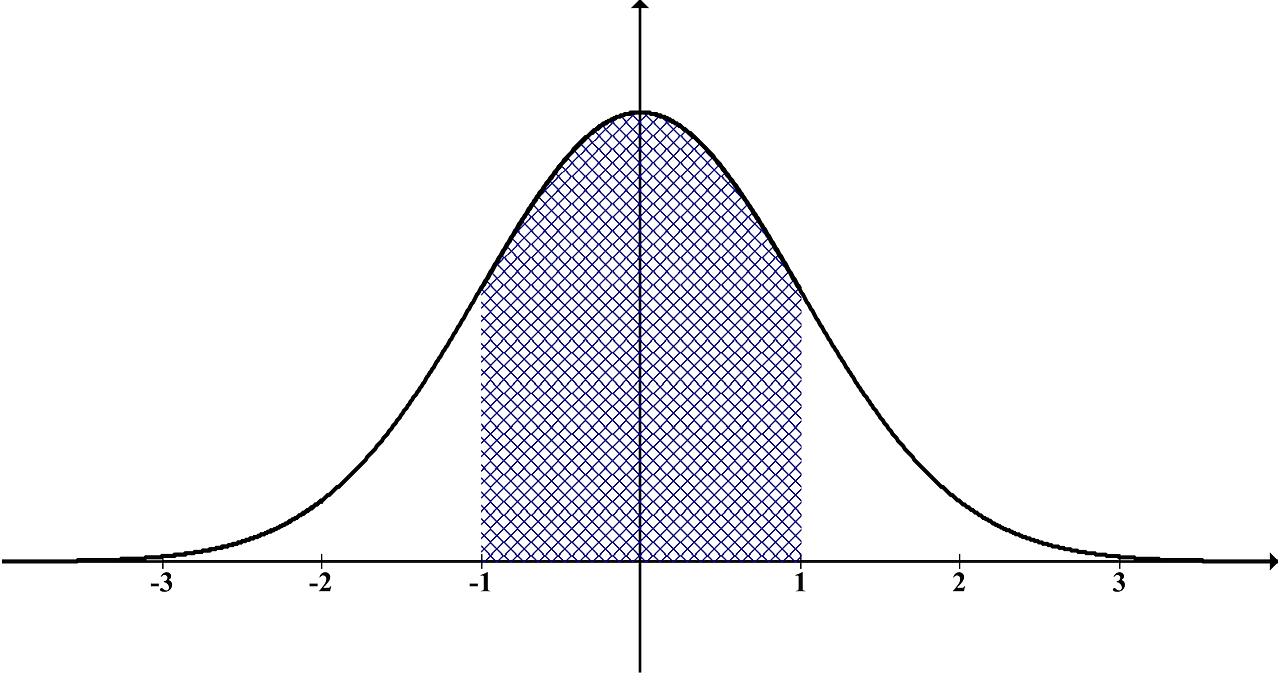

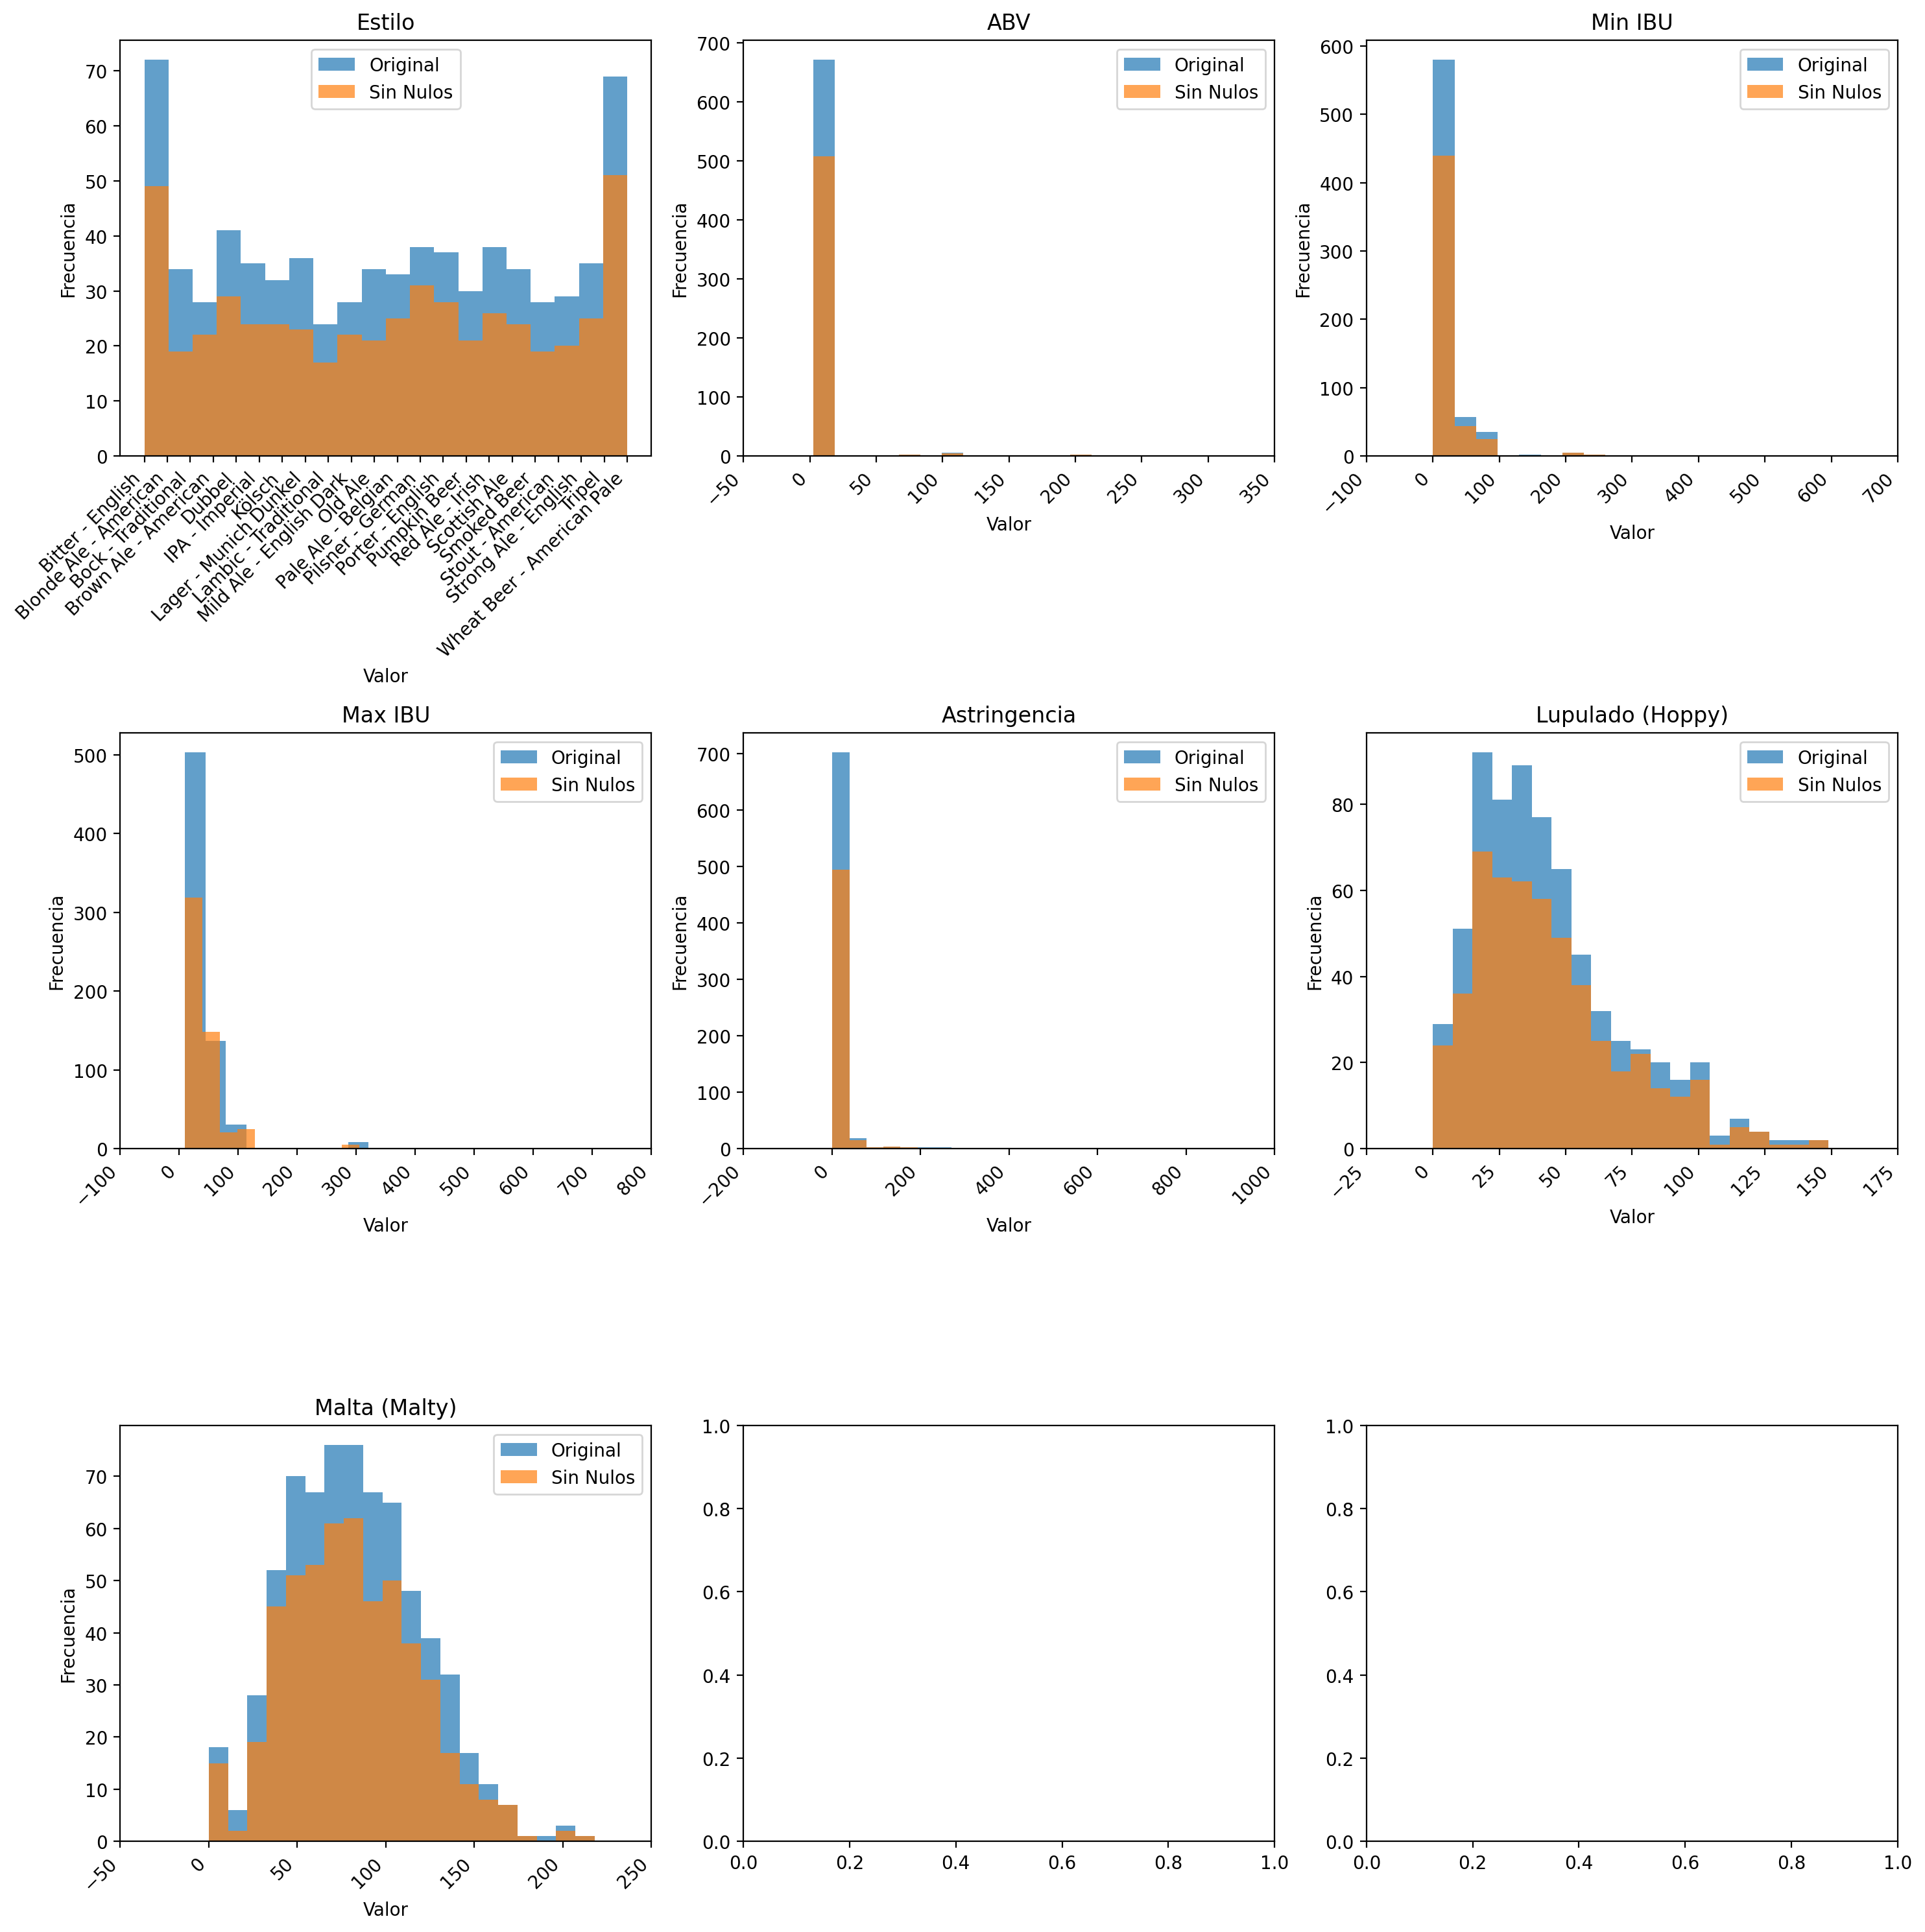

In [ ]:
# Crear una figura con 9 subplots organizados en 3 filas y 3 columnas
num_columns = 3
num_rows = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 15))

# Aplanar la matriz de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Graficar las distribuciones de cada variable en df_beer
for idx, column in enumerate(df_beer.columns):
    ax = axes[idx]  # Obtener el eje actual
    ax.hist(df_beer[column], bins=20, alpha=0.7, label='Original')
    ax.hist(df_beer_sin_nulos[column], bins=20, alpha=0.7, label='Sin Nulos')
    ax.set_title(column)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Valor')
    ax.legend()

    # Configurar las marcas y etiquetas del eje x
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import zscore

# Definir un umbral para detectar outliers basados en z-score
outlier_threshold = 2

# Calcular los z-scores para las columnas numéricas
z_scores = zscore(df_beer_sin_nulos.select_dtypes(include=['float64', 'int64']))

# Crear un DataFrame de booleanos donde True indica la presencia de outliers
outliers_mask = (z_scores > outlier_threshold).any(axis=1)

# Crear un nuevo DataFrame df_beer_sin_outliers eliminando las filas con outliers
df_beer_sin_outliers = df_beer_sin_nulos[~outliers_mask]

# Imprimir DataFrame sin outliers
print(df_beer_sin_outliers)


                         Estilo  ABV  Min IBU  Max IBU  Astringencia  \
3              Bitter - English  4.5     20.0     35.0            16   
5              Bitter - English  5.0     20.0     35.0            11   
6              Bitter - English  4.7     20.0     35.0            15   
7              Bitter - English  5.0     20.0     35.0            20   
10             Bitter - English  4.2     20.0     35.0            17   
..                          ...  ...      ...      ...           ...   
729  Wheat Beer - American Pale  4.4     10.0     35.0            18   
730  Wheat Beer - American Pale  4.7     10.0     35.0            19   
732  Wheat Beer - American Pale  5.0     10.0     35.0            18   
733  Wheat Beer - American Pale  5.5     10.0     35.0            17   
734  Wheat Beer - American Pale  5.5     10.0     35.0            21   

     Lupulado (Hoppy)  Malta (Malty)  
3                76.0           61.0  
5                75.0           89.0  
6                9

In [ ]:
df_beer_sin_outliers

Estilo  ABV  Min IBU  Max IBU  Astringencia  \
3              Bitter - English  4.5     20.0     35.0            16   
5              Bitter - English  5.0     20.0     35.0            11   
6              Bitter - English  4.7     20.0     35.0            15   
7              Bitter - English  5.0     20.0     35.0            20   
10             Bitter - English  4.2     20.0     35.0            17   
..                          ...  ...      ...      ...           ...   
729  Wheat Beer - American Pale  4.4     10.0     35.0            18   
730  Wheat Beer - American Pale  4.7     10.0     35.0            19   
732  Wheat Beer - American Pale  5.0     10.0     35.0            18   
733  Wheat Beer - American Pale  5.5     10.0     35.0            17   
734  Wheat Beer - American Pale  5.5     10.0     35.0            21   

     Lupulado (Hoppy)  Malta (Malty)  
3                76.0           61.0  
5                75.0           89.0  
6                93.0           97.0  
7                43.0           56.0  
10               65.0           88.0  
..                ...            ...  
729              77.0           67.0  
730              49.0           64.0  
732              41.0           77.0  
733              21.0           69.0  
734              25.0           95.0  

[444 rows x 7 columns]

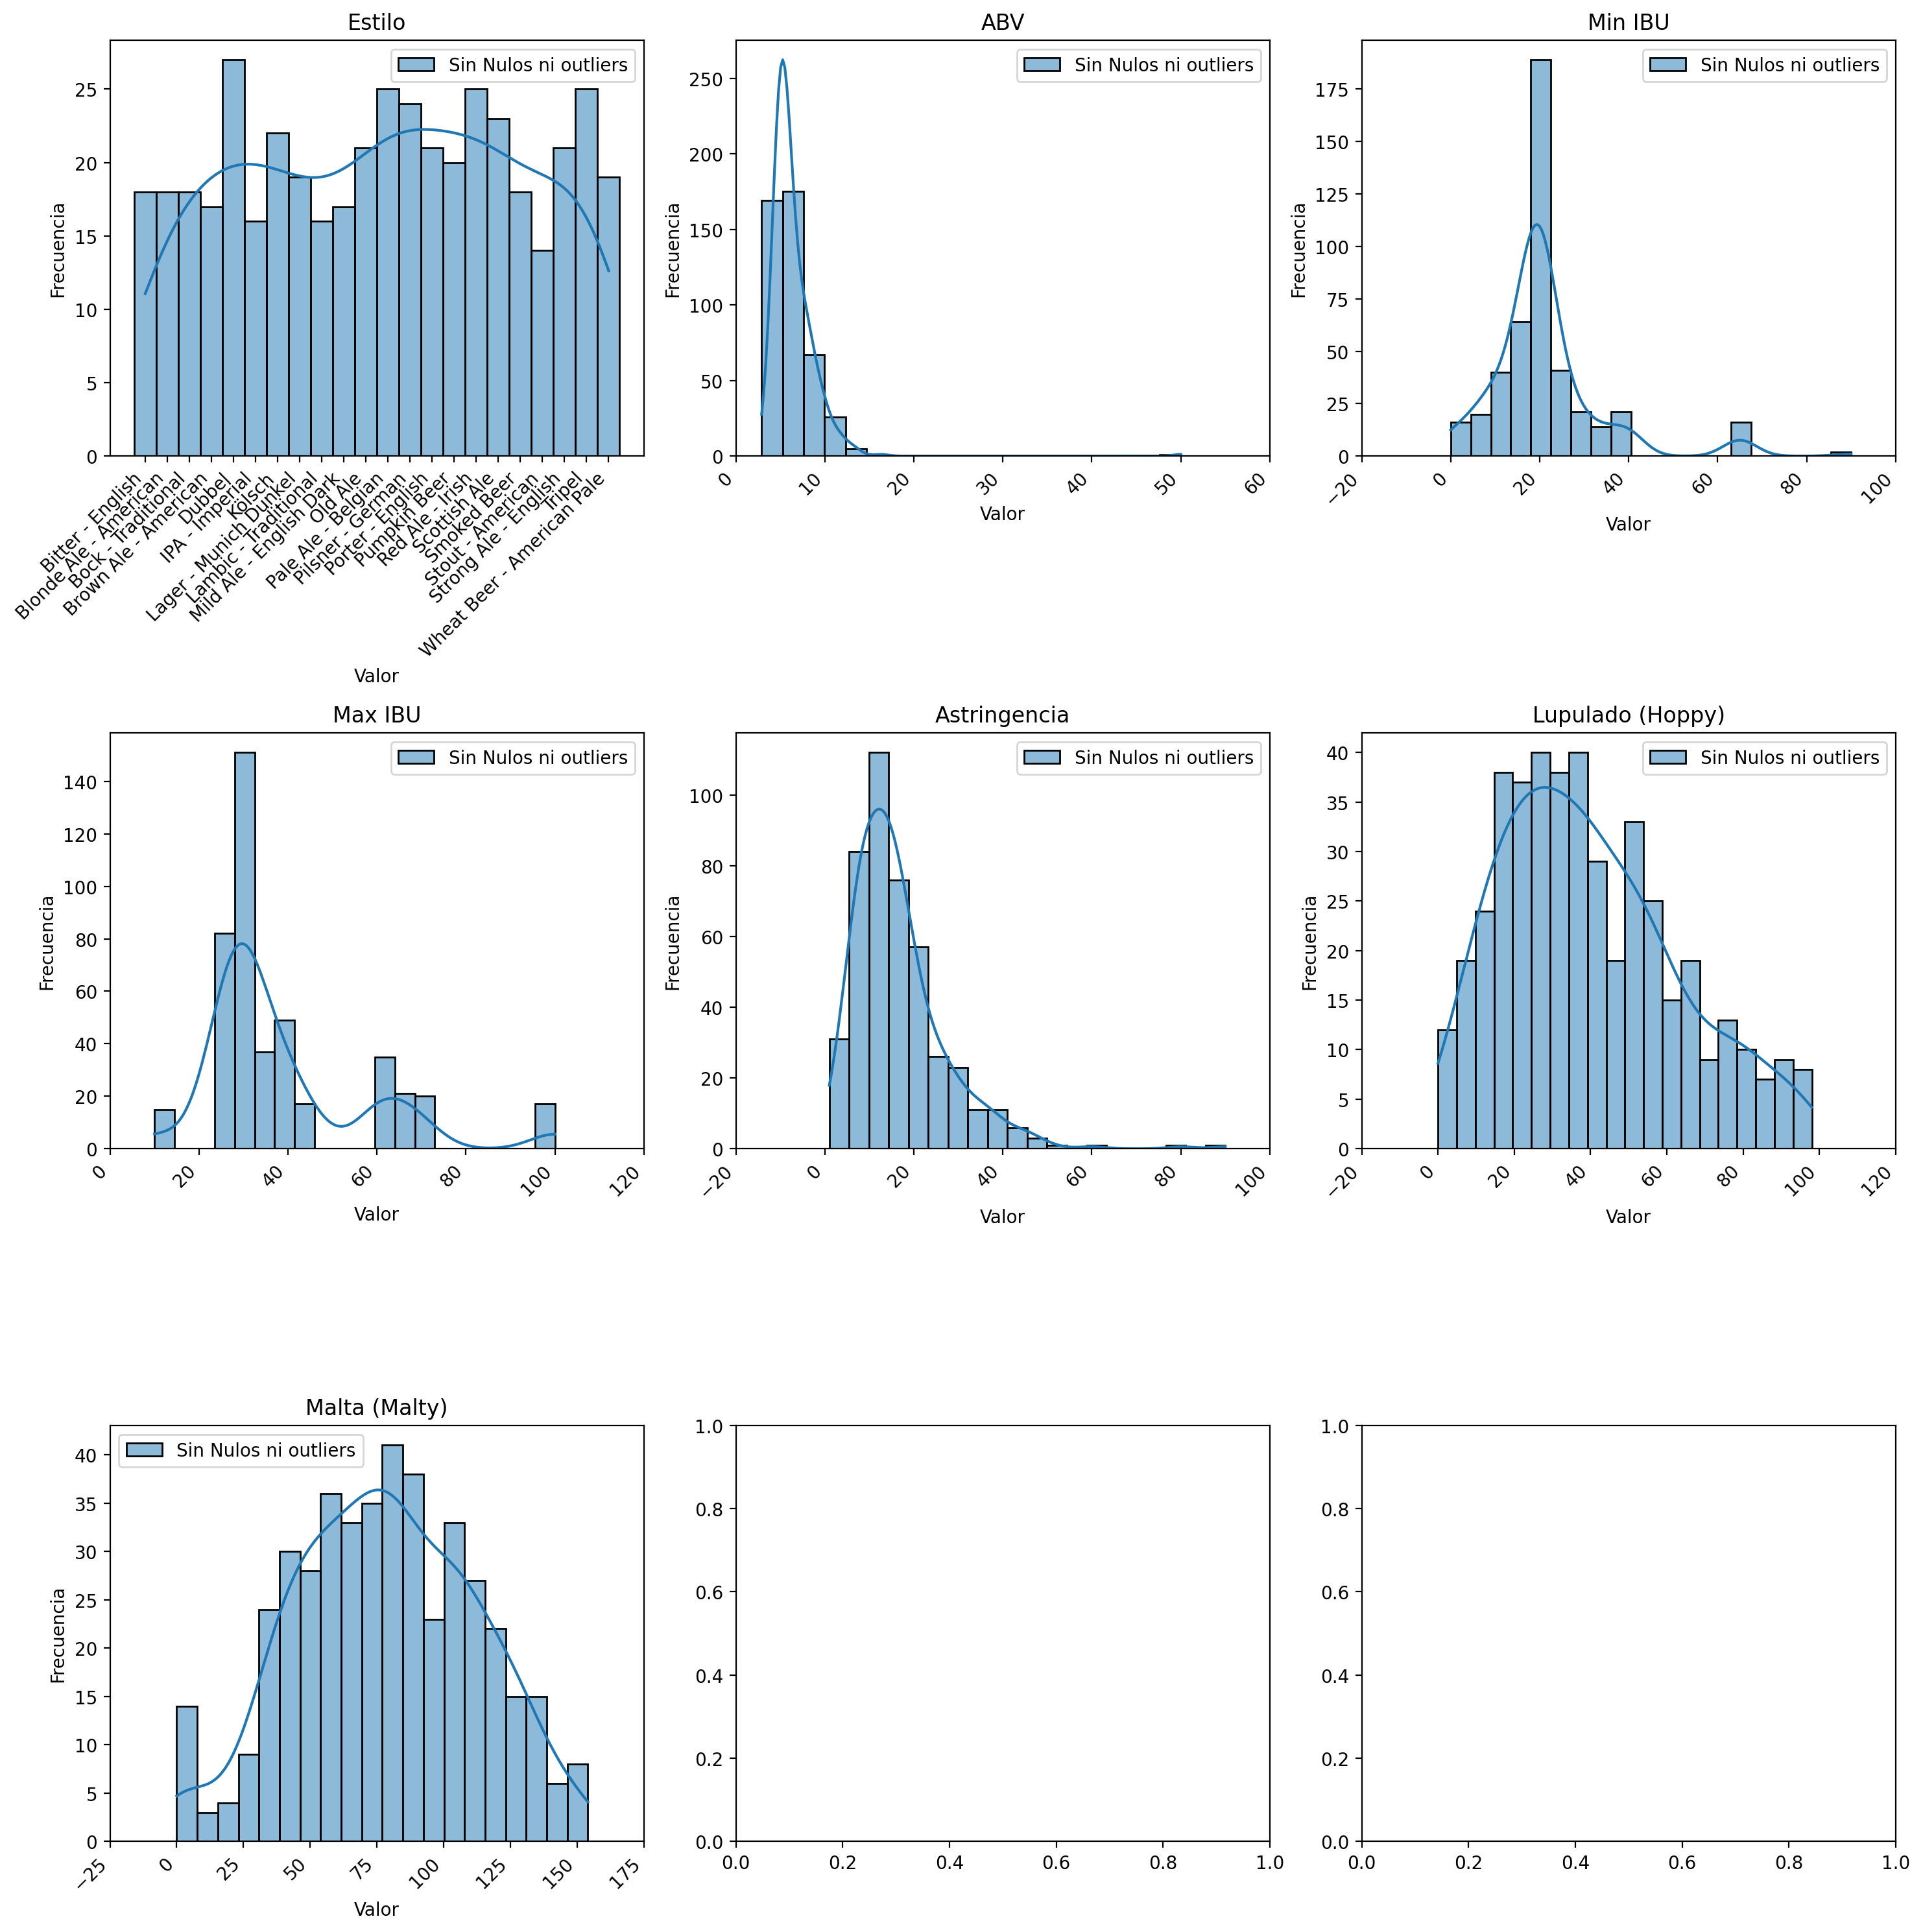

In [ ]:
import seaborn as sns

# Crear una figura con 9 subplots organizados en 3 filas y 3 columnas
num_columns = 3
num_rows = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 15))

# Aplanar la matriz de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Graficar las distribuciones de cada variable en df_beer
for idx, column in enumerate(df_beer.columns):
    ax = axes[idx]  # Obtener el eje actual
    sns.histplot(df_beer_sin_outliers[column], bins=20, ax=ax, label='Sin Nulos ni outliers', kde=True)
    ax.set_title(column)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Valor')
    ax.legend()

    # Configurar las marcas y etiquetas del eje x
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()


#### 2.2.2.1 Curación

##### Encoding de variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Crear una copia del DataFrame para evitar la advertencia
df_beer_sin_outliers_copy = df_beer_sin_outliers.copy()

# Codificar las etiquetas y asignarlas utilizando .loc en la copia
df_beer_sin_outliers_copy.loc[:, 'Estilo_encoded'] = label_encoder.fit_transform(df_beer_sin_outliers_copy['Estilo'])

# Imprimir el DataFrame con la columna 'Estilo_encoded'
df_beer_sin_outliers_copy


Estilo  ABV  Min IBU  Max IBU  Astringencia  \
3              Bitter - English  4.5     20.0     35.0            16   
5              Bitter - English  5.0     20.0     35.0            11   
6              Bitter - English  4.7     20.0     35.0            15   
7              Bitter - English  5.0     20.0     35.0            20   
10             Bitter - English  4.2     20.0     35.0            17   
..                          ...  ...      ...      ...           ...   
729  Wheat Beer - American Pale  4.4     10.0     35.0            18   
730  Wheat Beer - American Pale  4.7     10.0     35.0            19   
732  Wheat Beer - American Pale  5.0     10.0     35.0            18   
733  Wheat Beer - American Pale  5.5     10.0     35.0            17   
734  Wheat Beer - American Pale  5.5     10.0     35.0            21   

     Lupulado (Hoppy)  Malta (Malty)  Estilo_encoded  
3                76.0           61.0               0  
5                75.0           89.0               0  
6                93.0           97.0               0  
7                43.0           56.0               0  
10               65.0           88.0               0  
..                ...            ...             ...  
729              77.0           67.0              21  
730              49.0           64.0              21  
732              41.0           77.0              21  
733              21.0           69.0              21  
734              25.0           95.0              21  

[444 rows x 8 columns]

In [ ]:
# Crear un diccionario de mapeo de etiquetas originales a codificaciones
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Obtener la lista de nombres de clases ordenados por posición
class_names_ordered = [class_name for class_name, class_index in sorted(label_mapping.items(), key=lambda item: item[1])]

##### Separar en caracteristicas (x) y etiquetas (y)


In [ ]:
# Separar las características (X) y las etiquetas (Y)
X = df_beer_sin_outliers_copy[['ABV', 'Min IBU', 'Max IBU', 'Astringencia', 'Lupulado (Hoppy)', 'Malta (Malty)']]
Y = df_beer_sin_outliers_copy['Estilo_encoded']

#### 2.2.1.3 Creación de modelo 1



In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba
x_train, x_test ,y_train, y_test = train_test_split( X , Y , random_state=10)

In [ ]:
# Entrenamos:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6).fit(x_train, y_train)

# Hacemos la predicción:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))

accuracy = 0.8378378378378378


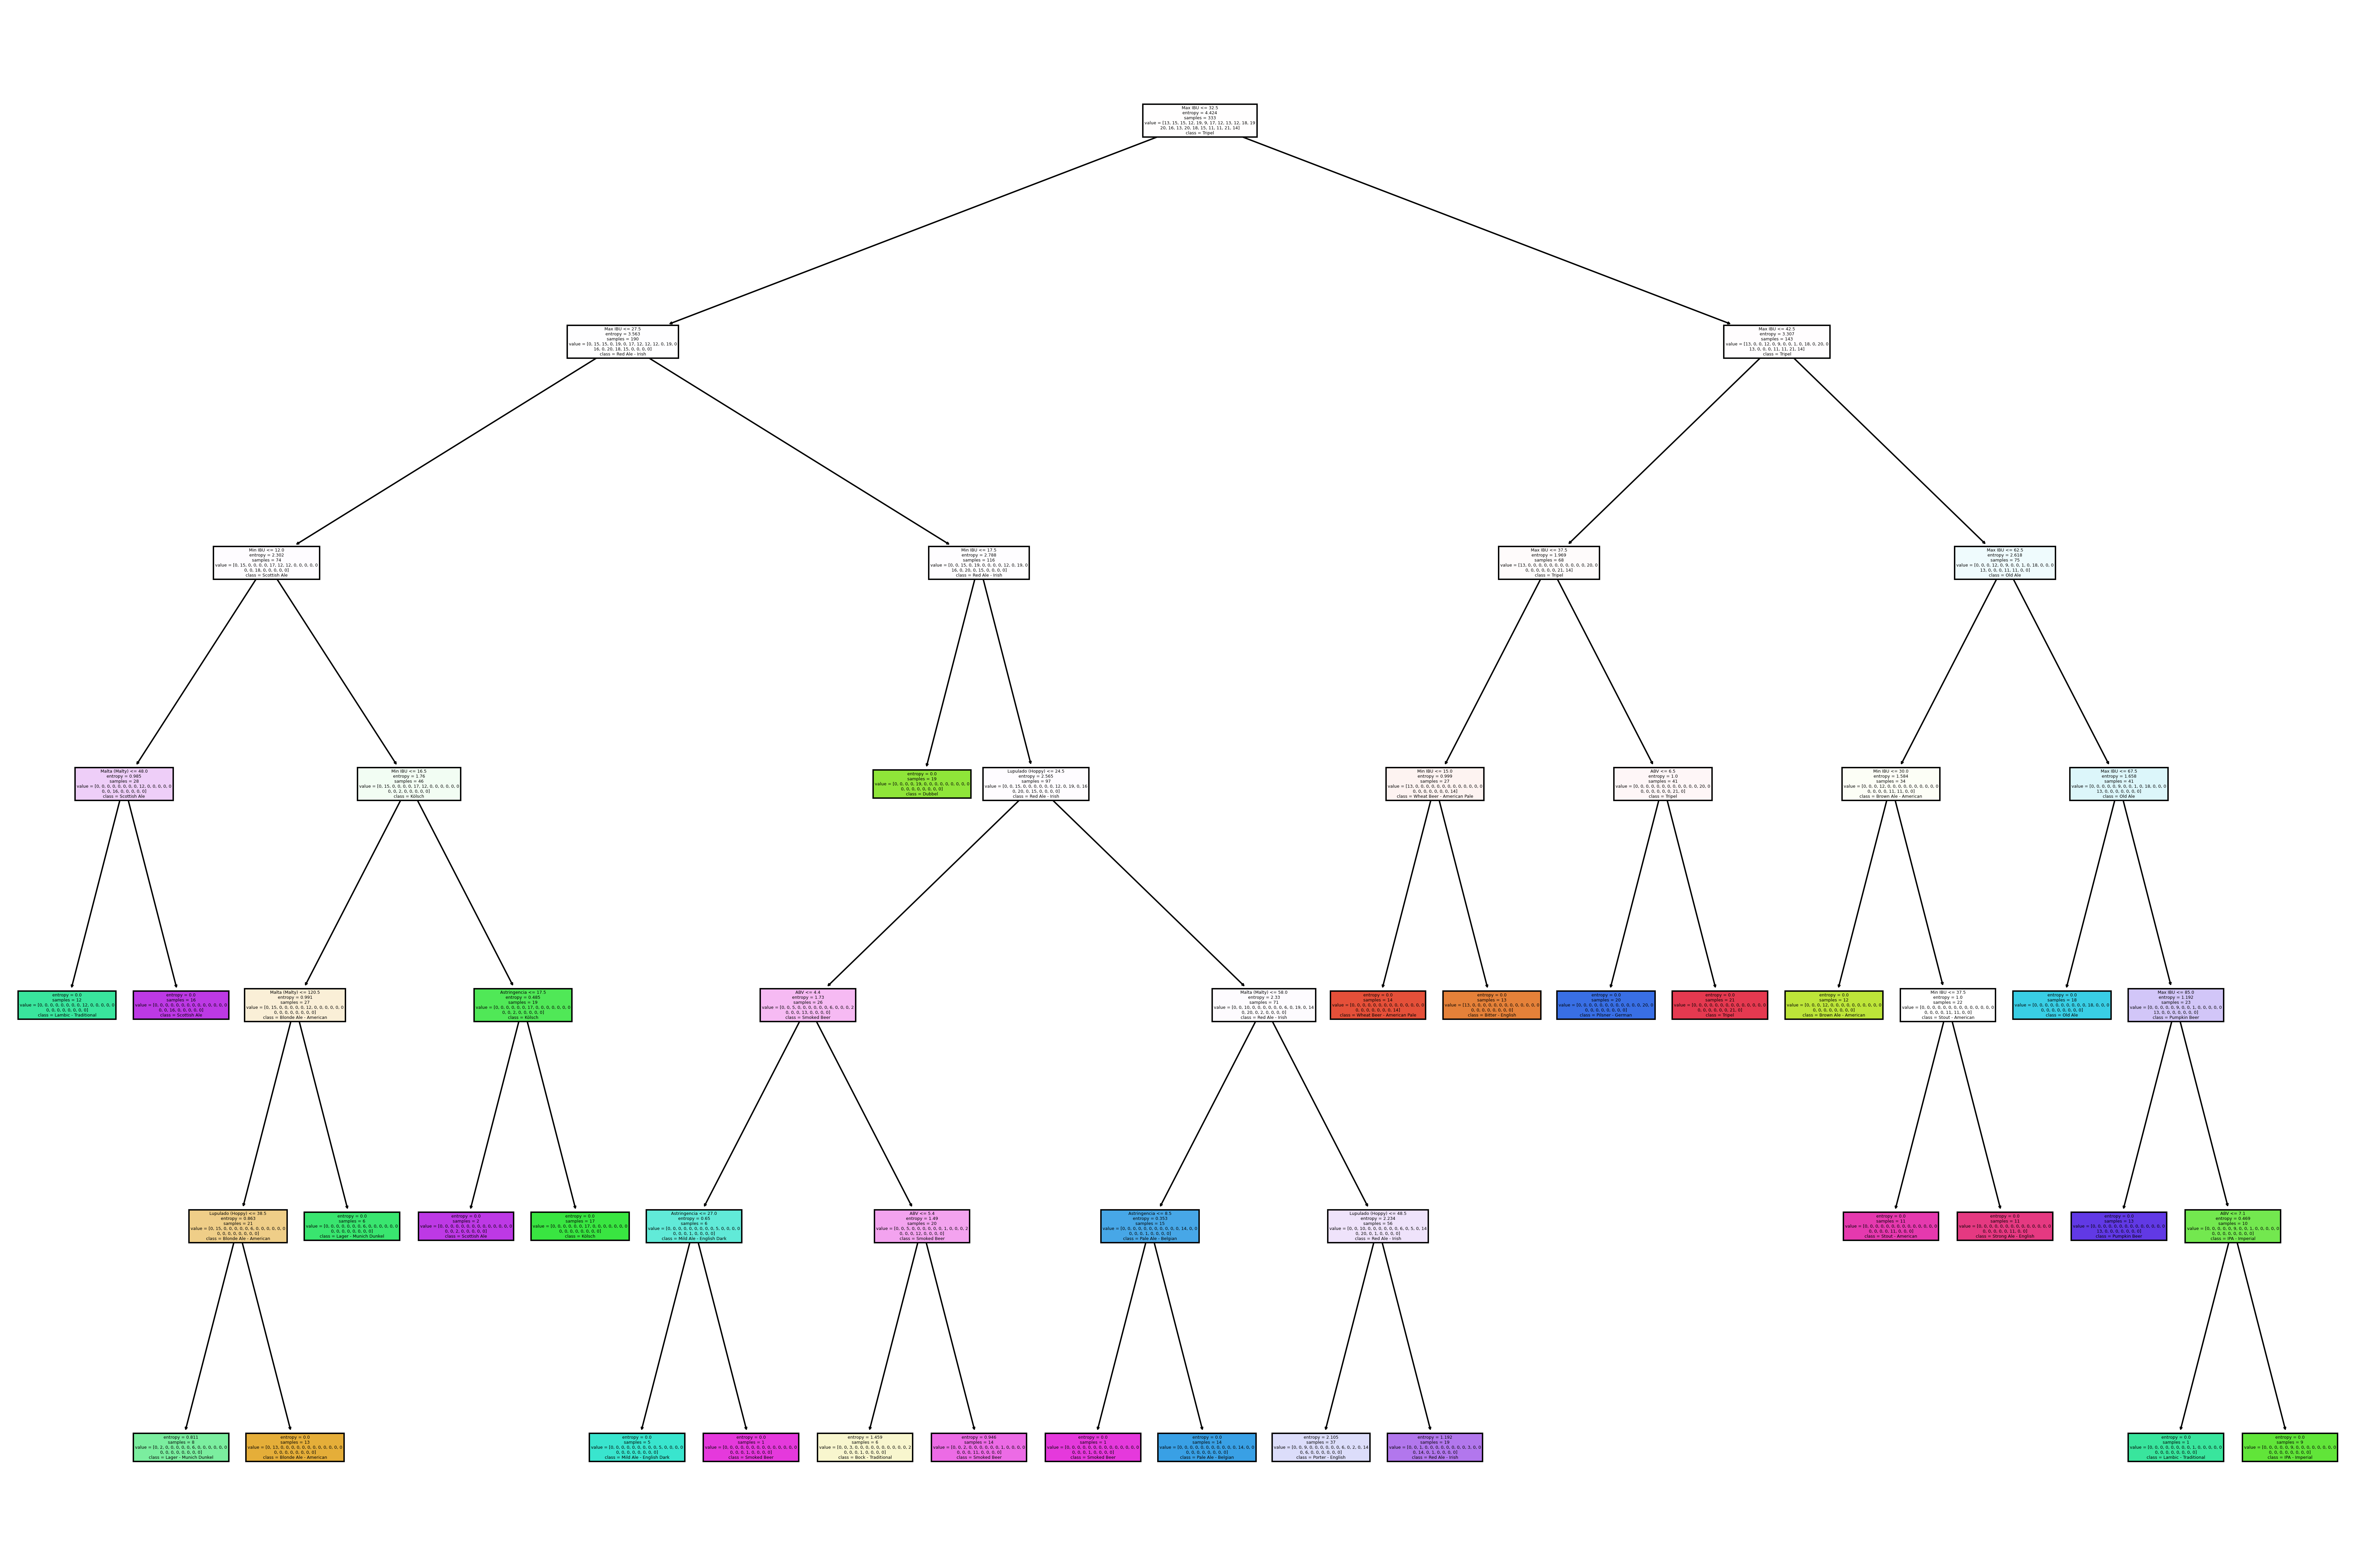

In [ ]:
# Graficamos árbol de decisión.
plt.rcParams["figure.dpi"] = 300
plt.figure(figsize=(30,20))
plot_tree(clf, filled=True, feature_names = X.columns, class_names = class_names_ordered)
# plt.savefig('arbol.png')
plt.show()

###🟢2.2.2 Camino "medio"

Nosotros eliminamos las filas con valores nulos, bajamos un 30% la cantidad de datos. Este procedimiento nos hace perder información. Por lo que vamos a intentar otro camino.

Imputación por la media.

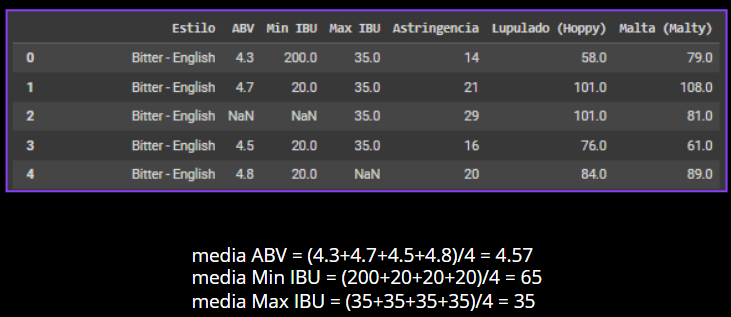

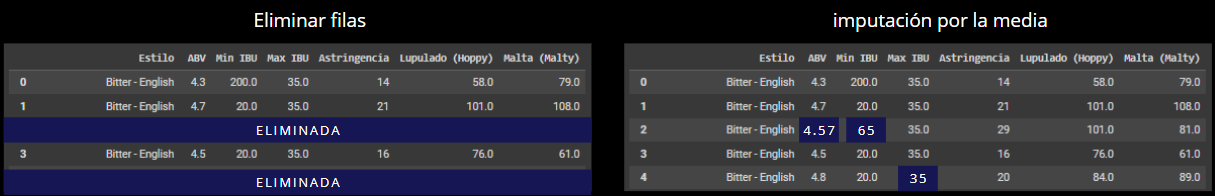

#### 2.2.2.1 Limpieza

In [ ]:
from scipy.stats import zscore

# Definir un umbral para detectar outliers basados en z-score
outlier_threshold = 2

# Calcular los z-scores para las columnas numéricas
z_scores = zscore(df_beer.select_dtypes(include=['float64', 'int64']),nan_policy= 'omit')

# Crear un DataFrame de booleanos donde True indica la presencia de outliers
outliers_mask = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

# Calcular las medias de las columnas numéricas
column_means = df_beer.select_dtypes(include=['float64', 'int64']).mean()

# Crear un DataFrame corregido a partir del original
df_beer_sin_outliers_2 = df_beer.copy()

# Iterar sobre las columnas numéricas y reemplazar los valores atípicos con las medias
for column in column_means.index:
    print(column, round(column_means[column],5))
    df_beer_sin_outliers_2.loc[outliers_mask[column], column] = column_means[column]



ABV 8.53692
Min IBU 26.29927
Max IBU 46.40876
Astringencia 20.12925
Lupulado (Hoppy) 43.00292
Malta (Malty) 81.93139


<ipython-input-47-d1c0148e45cb>:21: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '20.12925170068027' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



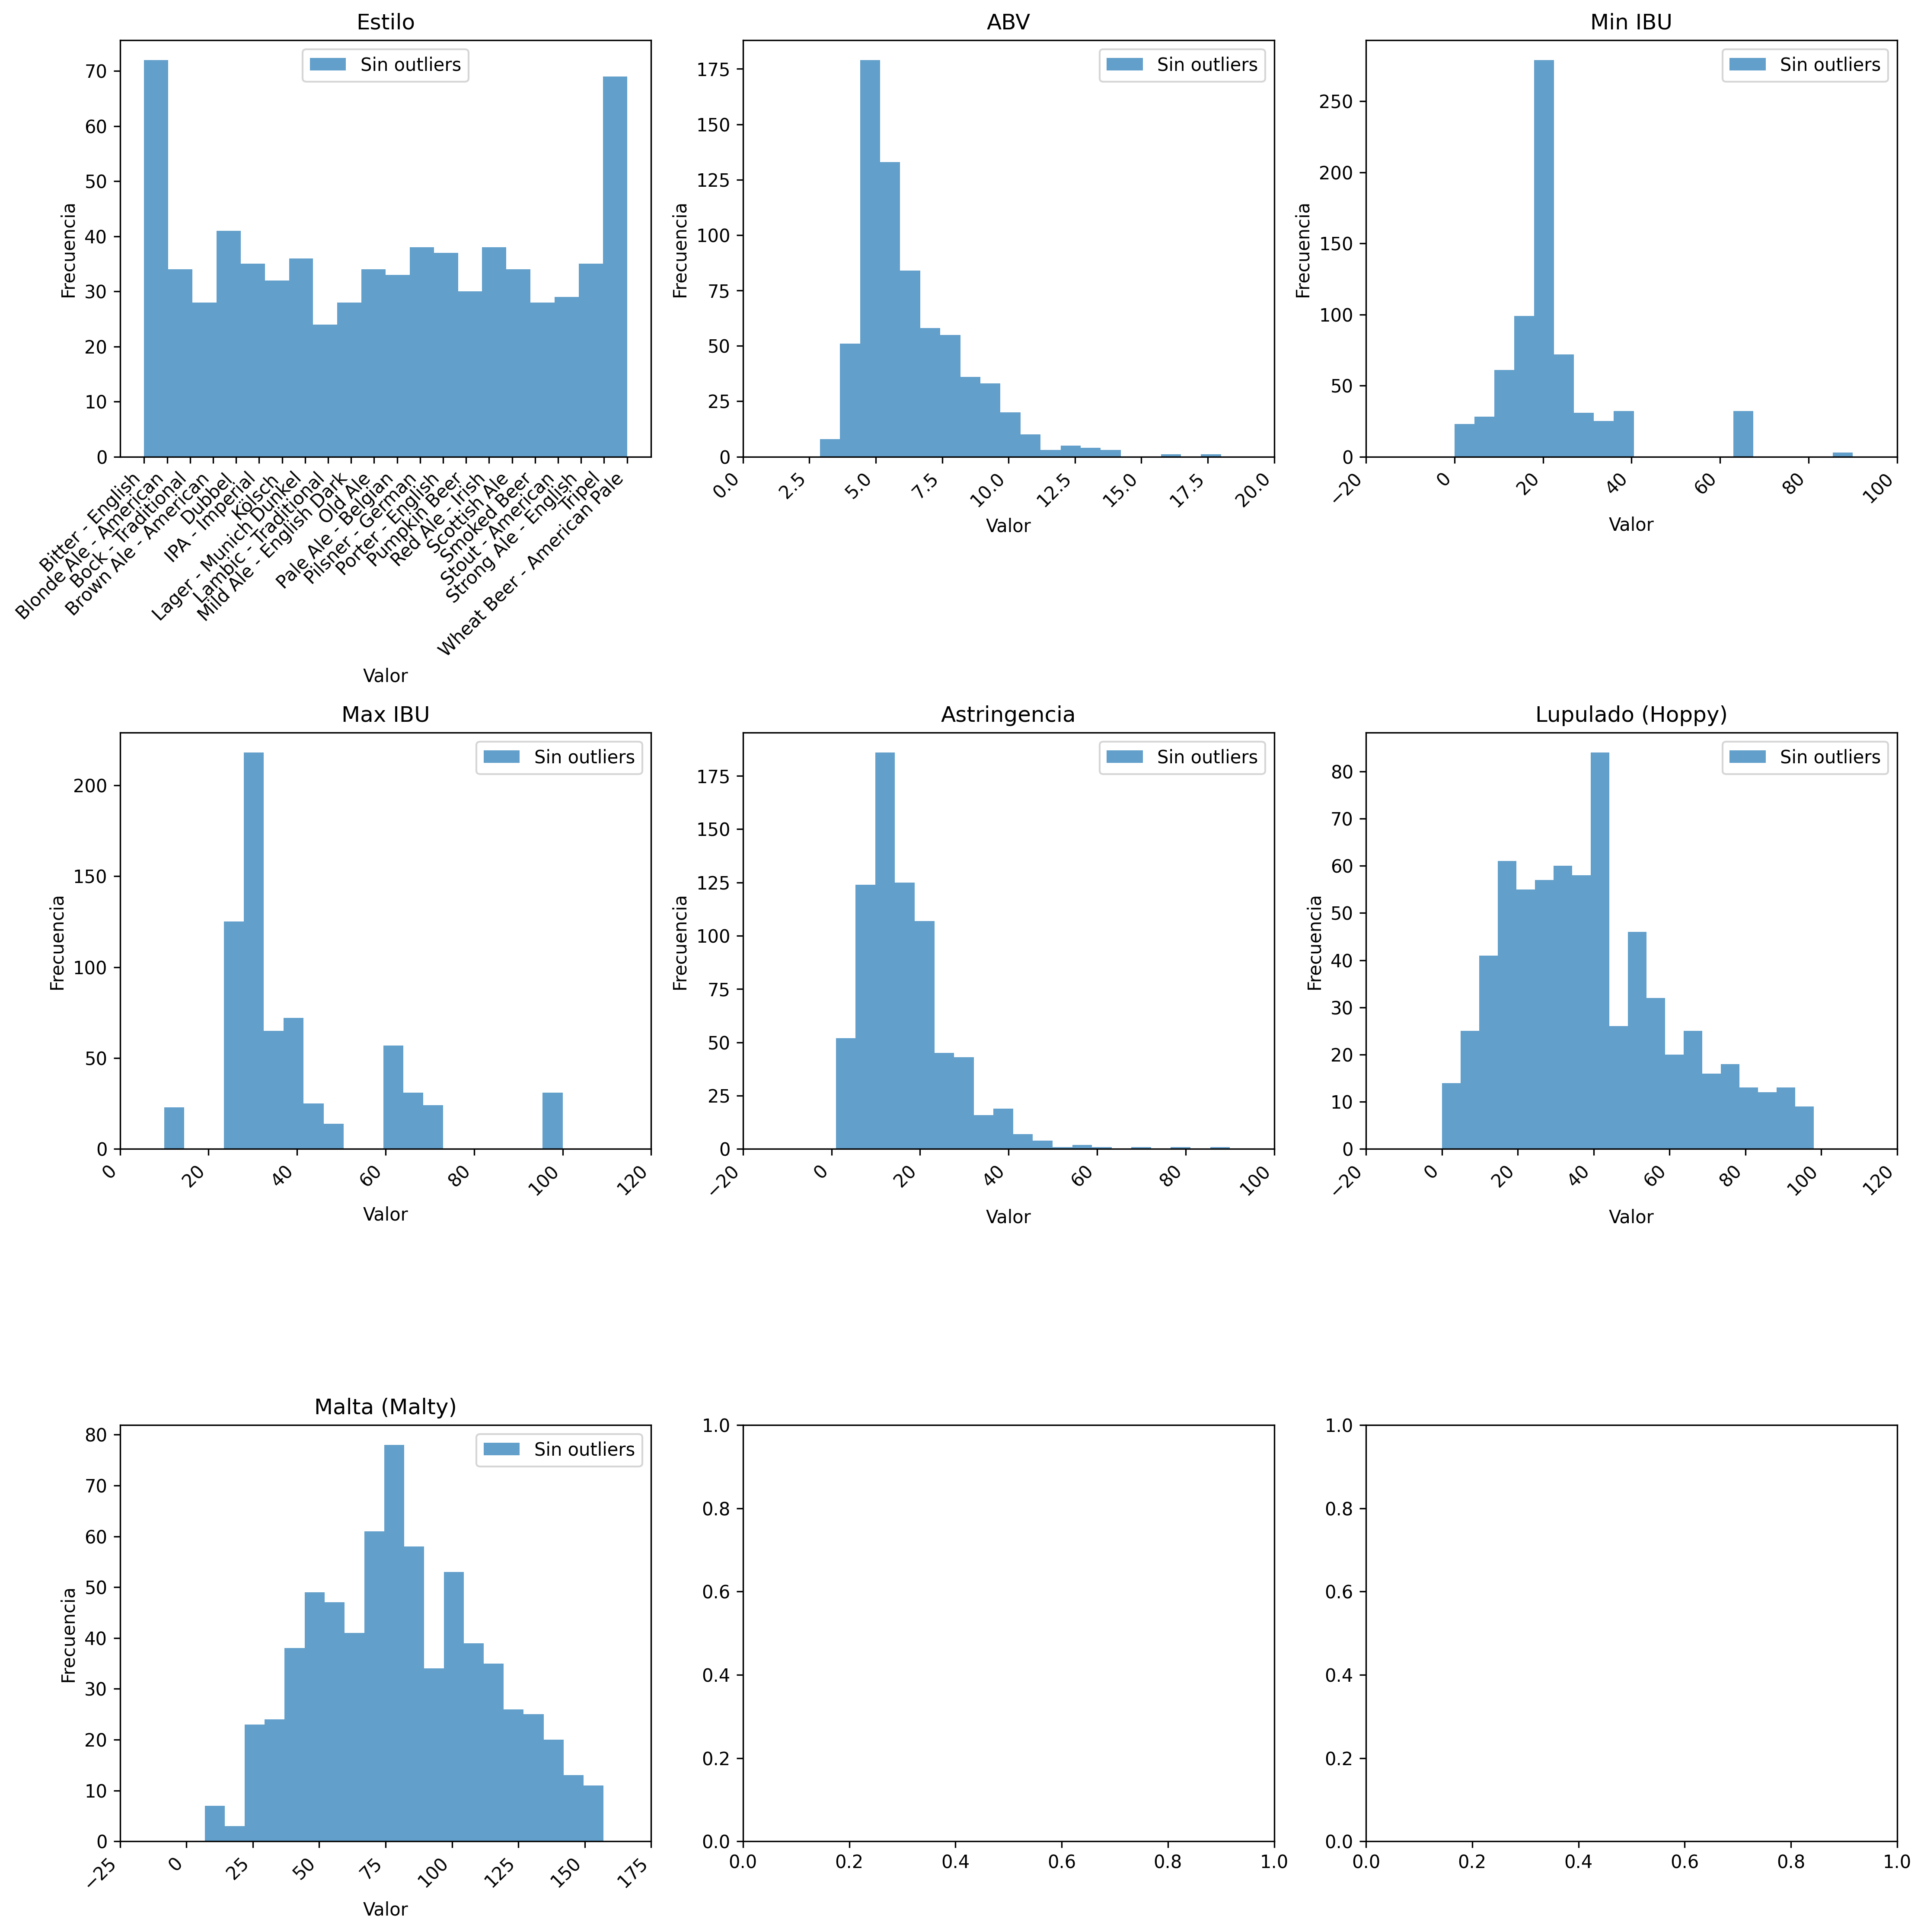

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con 9 subplots organizados en 3 filas y 3 columnas
num_columns = 3
num_rows = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 15))

# Aplanar la matriz de ejes para facilitar el acceso en el bucle
axes = axes.flatten()

# Graficar las distribuciones de cada variable en df_beer
for idx, column in enumerate(df_beer.columns):
    ax = axes[idx]  # Obtener el eje actual
    ax.hist(df_beer_sin_outliers_2[column], bins=20, alpha=0.7, label='Sin outliers')
    ax.set_title(column)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Valor')
    ax.legend()

    # Configurar las marcas y etiquetas del eje x
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [ ]:
# Reemplazar los valores NaN por las medias de las columnas
df_beer_limpio_2 = df_beer_sin_outliers_2.fillna(column_means)

In [ ]:
print('Limpio y con reemplazo de nan y ouliers:')
print('---------------------------------------------------')
df_beer_limpio_2.info()

print(' ')
print('Dataset crudo: ')
print('---------------------------------------------------')
df_beer.info()

Limpio y con reemplazo de nan y ouliers:
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estilo            735 non-null    object 
 1   ABV               735 non-null    float64
 2   Min IBU           735 non-null    float64
 3   Max IBU           735 non-null    float64
 4   Astringencia      735 non-null    float64
 5   Lupulado (Hoppy)  735 non-null    float64
 6   Malta (Malty)     735 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.3+ KB
 
Dataset crudo: 
---------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estilo            735 non-null    object 
 1   ABV    

#### 2.2.2.2 Curación

##### Encoding de variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Crear una copia del DataFrame para evitar la advertencia
df_beer_limpio_2_copy = df_beer_limpio_2.copy()

# Codificar las etiquetas y asignarlas utilizando .loc en la copia
df_beer_limpio_2_copy.loc[:, 'Estilo_encoded'] = label_encoder.fit_transform(df_beer_limpio_2_copy['Estilo'])

# Imprimir el DataFrame con la columna 'Estilo_encoded'
df_beer_limpio_2_copy


Estilo       ABV   Min IBU    Max IBU  Astringencia  \
0              Bitter - English  4.300000  26.29927  35.000000          14.0   
1              Bitter - English  4.700000  20.00000  35.000000          21.0   
2              Bitter - English  8.536915  26.29927  35.000000          29.0   
3              Bitter - English  4.500000  20.00000  35.000000          16.0   
4              Bitter - English  4.800000  20.00000  46.408759          20.0   
..                          ...       ...       ...        ...           ...   
730  Wheat Beer - American Pale  4.700000  10.00000  35.000000          19.0   
731  Wheat Beer - American Pale  4.500000  10.00000  35.000000          28.0   
732  Wheat Beer - American Pale  5.000000  10.00000  35.000000          18.0   
733  Wheat Beer - American Pale  5.500000  10.00000  35.000000          17.0   
734  Wheat Beer - American Pale  5.500000  10.00000  35.000000          21.0   

     Lupulado (Hoppy)  Malta (Malty)  Estilo_encoded  
0            58.00000           79.0               0  
1            43.00292          108.0               0  
2            43.00292           81.0               0  
3            76.00000           61.0               0  
4            84.00000           89.0               0  
..                ...            ...             ...  
730          49.00000           64.0              21  
731          43.00292           72.0              21  
732          41.00000           77.0              21  
733          21.00000           69.0              21  
734          25.00000           95.0              21  

[735 rows x 8 columns]

In [ ]:
# Crear un diccionario de mapeo de etiquetas originales a codificaciones
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Obtener la lista de nombres de clases ordenados por posición
class_names_ordered = [class_name for class_name, class_index in sorted(label_mapping.items(), key=lambda item: item[1])]

##### Separar en caracteristicas (x) y etiquetas (y)


In [ ]:
# Separar las características (X) y las etiquetas (Y)
X = df_beer_limpio_2_copy[['ABV', 'Min IBU', 'Max IBU', 'Astringencia', 'Lupulado (Hoppy)', 'Malta (Malty)']]
Y = df_beer_limpio_2_copy['Estilo_encoded']

#### 2.2.2.3 Creación de modelo 2



In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba
x_train, x_test ,y_train, y_test = train_test_split( X , Y , random_state= 4 )

In [ ]:
# Dividiremos el dataset en datos de entrenamiento y de prueba
x_train, x_test ,y_train, y_test = train_test_split( X , Y , random_state=4)
# Entrenamos:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= 6).fit(x_train, y_train)

# Hacemos la predicción:
y_pred = clf.predict(x_test)

# Probamos accuracy:
print('accuracy =' , accuracy_score(y_test,y_pred))

accuracy = 0.782608695652174


##🔶2.3 Consideraciones

* El modelo 1 fue realizado utilizando una base de datos procesada con un enfoque simple de eliminación de datos atípicos y nulos llevando la base de datos prácticamente a la mitad de ejemplos.
* Para el modelo 2 se utilizó un enfoque basado en la imputación de la media de todos los datos de la característica correspondiente, manteniendo la cantidad de ejemplos.
* El modelo 1 tiene una ligera mejor performance que el modelo 2

¿Qué pasó? 🤔❓

La imputación por la media, no es necesariamente el mejor enfoque, sobre todo en un dataset con tantas clases!
Generalmente se puede utilizar, sobre todo cuando hay pocos datos y no conocemos bien la naturaleza de la variable.
En este caso estamos obviando las medias de los valores que toma esa característica por clase, simplemente tomamos las medias de todas las clases!

Como todo, se requieren pruebas de performance tanto para los datos de prueba como para el modelo en producción ya que no existe una regla de oro a la hora de tomar el camino del preprocesamiento de los datos. Cada dataset es un mundo…


¿Cómo podría mejorar? 🧐

Inicialmente se podría probar con la imputación de la media por característica y por clase, esto generalmente es más preciso y mejora la performance. Esta estrategia podría proporcionar imputaciones más precisas y realistas, ya que tomaría en cuenta las características únicas de cada clase en lugar de tratar todas las clases por igual.

También existen otros caminos, como por ejemplo el de la imputación por regresión. En este caso se debe entrenar un modelo regresor que nos ayude a reemplazar los valores atípicos y nulos basados en el conjunto de características del dataset, una vez reemplazados los valores se puede entrenar el modelo que utilizaremos. Esto es especialmente útil si ,al realizar la inferencia también se obtienen datos anómalos.




##🔶2.4 Predecir resultado

In [ ]:
#@markdown #Predictor de resultados
#@markdown Para predecir el tipo de cerveza ingrese los siguientes datos:

#@markdown Contenido de Alcohol por Volumen:
ABV = 0 # @param {type:"number"}

#@markdown Unidades Internacionales de Amargura (Min)
Min_IBU = 20 # @param {type:"number"}

#@markdown Unidades Internacionales de Amargura (Max)
Max_IBU = 35 # @param {type:"number"}

#@markdown Nivel de astringencia
Astringencia = 15 # @param {type:"number"}

#@markdown Lupulado
Lupulado = 85 # @param {type:"number"}

#@markdown Malta
Malta = 65 # @param {type:"number"}

entrada = [ABV, Min_IBU, Max_IBU, Astringencia, Lupulado, Malta]

entrada = pd.DataFrame(np.array(entrada).reshape(1, 6))
entrada.columns = ['ABV', 'Min IBU', 'Max IBU', 'Astringencia', 'Lupulado (Hoppy)', 'Malta (Malty)']
y_pred = clf.predict(entrada)

print(class_names_ordered[y_pred[0]])

Bitter - English


# 3️⃣ Ejemplo

🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗

Usted trabaja en el Tribunal de Faltas revisando casos. Entre la documentación a revisar, se encuentra la fotomulta.

Su jefe le pidió revisar 250 mil fotomultas en un mes (su jefe no tiene mucho criterio), por lo que usted considera que podría automatizar la revisión de las fotomultas usando IA.

🟣 Las condiciones son las siguientes:

- Debe haber al menos un vehículo en la imagen. 🚗
- Si hay un camión o camioneta, debe guardarse la fotomulta en una carpeta especial. 🚚
- No hay problema si hay más de un vehículo en la imagen. 🚗🚗

Mientras piensa cómo resolver su problema con tan poco tiempo, recuerda que TensorFlow tiene un dataset que cuenta con imágenes de vehículos.

🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗🚗




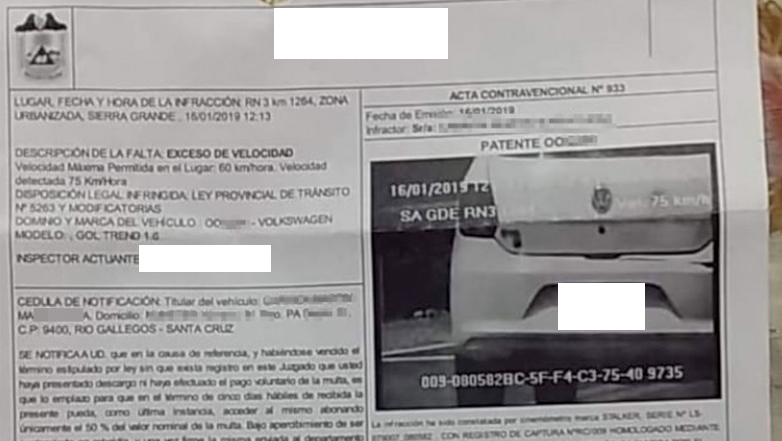

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


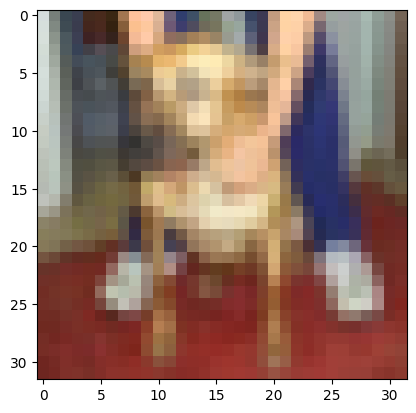

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(x_train[51])
plt.show()


In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from google.colab import files
import numpy as np
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗ ARQUITECTURA DE LA CNN ❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
# Definir el modelo Sequential
model = Sequential()

# Añadir la primera capa de convolución 2D
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Añadir la segunda capa de convolución 2D
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Añadir la tercera capa de convolución 2D
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Aplanar la salida y añadir capas densas
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(10, activation='softmax'))

# ❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗ FIN ARQUITECTURA DE LA CNN ❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.2088 - loss: 2.1981 - val_accuracy: 0.3958 - val_loss: 1.7438
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3629 - loss: 1.6926 - val_accuracy: 0.4725 - val_loss: 1.4636
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4322 - loss: 1.5205 - val_accuracy: 0.5250 - val_loss: 1.3665
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4787 - loss: 1.4101 - val_accuracy: 0.5674 - val_loss: 1.1984
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5249 - loss: 1.3110 - val_accuracy: 0.6298 - val_loss: 1.0756
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5570 - loss: 1.2487 - val_accuracy: 0.6433 - val_loss: 1.0348
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5788 - loss: 1.1801 - val_accuracy: 0.6263 - val_loss: 1.0552
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6065 - loss: 1.1

In [23]:
# Función para cargar una imagen desde la computadora
def upload_and_preprocess_images():
    uploaded = files.upload()
    images = []
    for fn in uploaded.keys():
        img = Image.open(BytesIO(uploaded[fn]))
        img = img.resize((32, 32))
        img = np.array(img)
        if img.shape == (32, 32, 3):  # Asegurarse de que es una imagen RGB
            images.append(img)
    images = np.array(images)
    images = images / 255.0  # Normalizar las imágenes
    return images

# Cargar y preprocesar nuevas imágenes (opcional)
uploaded_images = upload_and_preprocess_images()

# Predecir con nuevas imágenes (opcional)
if len(uploaded_images) > 0:
    predictions = model.predict(uploaded_images)
    for i, img in enumerate(uploaded_images):
        if class_names[np.argmax(predictions[i])] == "truck":
          print("❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗")
          print("Guardar en carpeta especial!")
          print("❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗")

          # Lógica de guardado de imagen en carpeta especial

        plt.imshow(img)
        plt.title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
        plt.show()

Saving auto.png to auto (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


## 🛑 Que problema...

Nuevos problemas:

🔸 De los 250000 detectó de manera incorrecta 200000.

🔸 Están a punto de echarlo y le quedan pocos días para terminar el sistema.

🔸 Adicionalmente su jefe (que tiene muchas ganas de echar) le pide que detecte la posición del vehiculo, para corroborar que no se salga de cuadro.

Sin entrar en pánico, recuerda que hay un modelo llamado YOLO que puede ayudar con estos requerimientos.

In [14]:
!git clone https://github.com/ultralytics/yolov5  # Clona el repositorio de YOLOv5
%cd yolov5
!pip install -r requirements.txt  # Instala las dependencias necesarias

Cloning into 'yolov5'...
remote: Enumerating objects: 17055, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 17055 (delta 17), reused 24 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17055/17055), 15.67 MiB | 17.41 MiB/s, done.
Resolving deltas: 100% (11712/11712), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 24.0 MB/s eta 0:00:00


Saving auto.png to auto (2).png


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-11-21 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 489x785 2 cars
Speed: 11.1ms pre-process, 7.6ms inference, 4.2ms NMS per image at shape (1, 3, 416, 640)


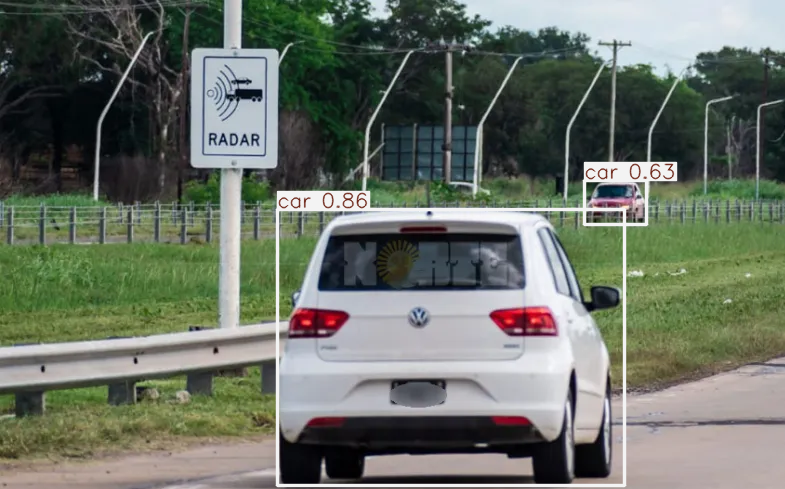

In [24]:
from google.colab import files
import torch
from pathlib import Path
from PIL import Image  # Añadir PIL para cargar imágenes si es necesario

# Subir tus imágenes
uploaded = files.upload()

# Guardar las rutas de las imágenes subidas
image_paths = list(uploaded.keys())

# Cargar el modelo preentrenado YOLOv5s
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Realizar la detección de objetos en las imágenes
results = model_yolo(image_paths)

# Mostrar los resultados
results.print()  # Imprime los resultados en la consola
results.show()   # Muestra las imágenes con las detecciones

# 4️⃣ Ejemplo

Usted trabaja en una empresa de software como data scientist. Lo transfieren a un proyecto que se encuentra cercano a una deadline sin avances significativos (todo es crisis). El sistema analiza expedientes policiales del sistema judicial de Suiza 😉😉, extrayendo información relevante para clasificar su nivel de riesgo. Al conocer su riesgo es posible darle prioridad haciendo que los expedientes mas riesgosos sean revisados por los jueces antes que los menos riesgosos.

Los expedientes tienen alrededor de 100 páginas escaneadas. Lo que complica el uso de NLP debido al excesivo tiempo que requiere la digitalización de tantas páginas utilizando OCR para extraer el texto. Pero ingeniería detecta que hay una página que tiene la información mas relevante y que tiene un patron visual notable, por lo que deciden utilizar modelos de visión computacional para obtener esa página.

Su misión es extraer los datos de esa página de la manera mas eficiente...

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def predecir_riesgo(filename):
    white_pixls = []

    # Carga la imagen desde el path proporcionado
    src = cv.imread(filename, cv.IMREAD_COLOR)

    # Verifica si la imagen fue cargada correctamente
    if src is None:
        print('Error al abrir la imagen. Verifica el path:', filename)
        return -1

    # Convierte la imagen a escala de grises
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    gray = cv.medianBlur(gray, 5)

    # Detecta círculos usando HoughCircles
    rows = gray.shape[1]
    circles = cv.HoughCircles(
        gray,
        cv.HOUGH_GRADIENT,
        dp=1,
        minDist=rows / 4,
        param1=400,
        param2=18,
        minRadius=10,
        maxRadius=50
    )

    if circles is not None:
        # Ordena los círculos detectados por su posición en el eje X
        sorted_circles = np.expand_dims(circles[0][np.argsort(circles[0][:, 0])], axis=0)
        sorted_circles = np.uint16(np.around(sorted_circles))

        for i in sorted_circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]
            mask_radius = int(radius - (radius / 8))

            # Crea una máscara circular
            height, width, _ = src.shape
            circle_img = np.zeros((height, width), np.uint8)
            cv.circle(circle_img, center, mask_radius, 1, thickness=-1)

            # Aplica la máscara a la imagen original
            masked_data = cv.bitwise_and(src, src, mask=circle_img)

            # Calcula la cantidad de píxeles blancos
            number_of_white_pix = int(np.sum(masked_data == 255))
            white_pixls.append(number_of_white_pix)

    # Dibuja los círculos detectados en la imagen
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            cv.circle(src, center, 1, (0, 100, 100), 3)  # Centro del círculo
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)  # Contorno del círculo

    # Muestra la imagen y clasifica el riesgo
    plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

    labels = ["Riesgo leve", "Riesgo moderado", "Riesgo severo"]

    if white_pixls:
        min_white_value = min(white_pixls)
        label = white_pixls.index(min_white_value)
        plt.title(labels[label])
        print("Nivel de riesgo:", labels[label])
    else:
        plt.title("No se detectaron círculos")
        print("No se detectaron círculos.")

    plt.show()

filename = r"D:\IALAB\Procuracion\clase_ia_fcefyn_data\955-2017.pdf0001-12.jpg_0_1.jpg"
predecir_riesgo(filename)


# 5️⃣ Ejemplo

Usted debe desarrollar un microservicio que analice y clasifique documentación legal como parte de un software de gestión de documentos del gobierno de Nueva Zelanda.

El cliente le pide que clasifique entre 3 tipos de documentos:

- Demandas

- Contratos

- Desconocido

Usted diseña la pipeline y genera un dataset que contiene texto extraido de las primeras páginas de cada documento. En esta instancia debe entrenar un modelo que sea capaz de clasificar el texto, sin recurrir al uso de grandes modelos de lenguaje generativos, debido a que tiene acceso a hardware bastante acotado.

## Bert

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.31      0.47        13
           2       0.75      1.00      0.86        12

    accuracy                           0.75        36
   macro avg       0.81      0.77      0.71        36
weighted avg       0.82      0.75      0.70        36



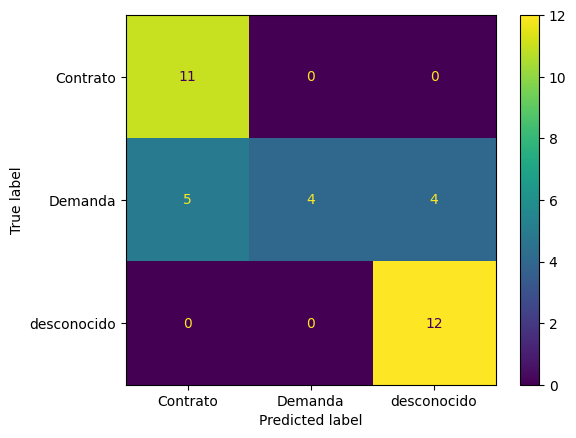

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

# Cargar el archivo CSV
df = pd.read_csv('data_ejemplo_5.csv')

# Asignar etiquetas numéricas para las tres categorías: contrato (0), demanda (1), desconocido (2)
category_mapping = {'contrato': 0, 'demanda': 1, 'desconocido': 2}
df['label'] = df['label'].map(category_mapping)

# Dividir los datos en entrenamiento y prueba
train_texts, val_texts, train_labels, val_labels = train_test_split(df['data'], df['label'], test_size=0.2, random_state=42)

# Tokenizar los textos con BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts.iloc[idx]
        label = self.labels.iloc[idx]
        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Crear datasets para entrenamiento y validación
train_dataset = TextDataset(train_texts, train_labels, tokenizer)
val_dataset = TextDataset(val_texts, val_labels, tokenizer)

# Cargar el modelo BERT para clasificación de secuencias con 3 categorías
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_strategy="steps",
    report_to="none"
)

# Crear el trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Entrenar el modelo
trainer.train()

# Hacer predicciones en el conjunto de validación
predictions = trainer.predict(val_dataset)
pred_labels = predictions.predictions.argmax(axis=-1)

# Calcular el classification report y la matriz de confusión
print(classification_report(val_labels, pred_labels))
cm = confusion_matrix(val_labels, pred_labels)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Contrato', 'Demanda', 'desconocido']).plot()


## Y si usamos regex?

In [7]:
import pandas as pd

# Extraer textos y etiquetas del conjunto de validación
val_texts = val_texts.reset_index(drop=True)  # Asegúrate de que los índices estén alineados
val_labels = val_labels.reset_index(drop=True)  # Asegúrate de que los índices estén alineados

# Mapeo de etiquetas numéricas a texto
category_mapping_reverse = {0: 'contrato', 1: 'demanda', 2: 'desconocido'}

# Convertir las etiquetas numéricas a texto usando el mapeo
val_labels_text = val_labels.map(category_mapping_reverse)

# Crear el DataFrame del conjunto de validación
val_df = pd.DataFrame({
    'data': val_texts,
    'label': val_labels_text
})

# Mostrar el DataFrame de validación
print(val_df.head())


                                                data        label
0  Obras Viales S.A. y Infraestructura Regional S...      demanda
1  Construcciones del Valle enfrenta una demanda ...      demanda
2  El deporte es una forma de actividad física qu...  desconocido
3  El permutante 1, Ana Ruiz, y el permutante 2, ...     contrato
4  La educación en línea ha ganado mucha populari...  desconocido


<Figure size 800x600 with 0 Axes>

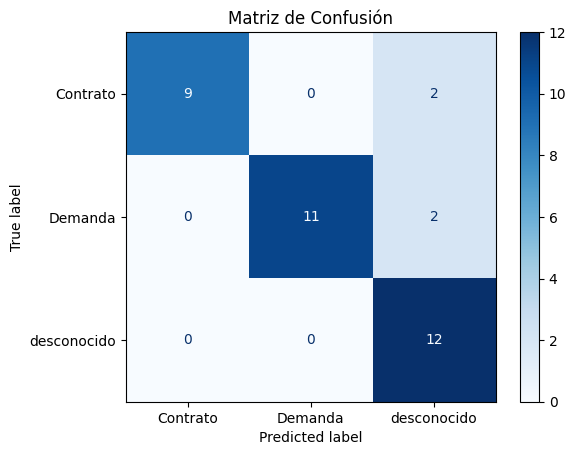


Informe de Clasificación:
              precision    recall  f1-score   support

    contrato       1.00      0.82      0.90        11
     demanda       1.00      0.85      0.92        13
 desconocido       0.75      1.00      0.86        12

    accuracy                           0.89        36
   macro avg       0.92      0.89      0.89        36
weighted avg       0.92      0.89      0.89        36



In [8]:
import pandas as pd
import re
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir las regex
regex_contrato = r"(?i)(convienen en|acuerdan|este contrato|el proveedor|el comprador|el arrendador|el empleado|el prestador|el franquiciante|los socios|la productora|el cedente|el contratista principal|el transportista|el donante|el fiduciario|el licenciante|firmado por las partes|por ambas partes|en virtud de este contrato|según lo estipulado|de acuerdo a este acuerdo|en el marco de este contrato|el acuerdo firmado|las condiciones pactadas|la contraparte|el suscriptor|las partes firmantes|condiciones acordadas|este acuerdo|el convenio|este documento|firma|suscriben|formalizan|se comprometen a|el contrato establece|el acuerdo incluye|se estipula|se pacta|el contrato tiene una duración|el acuerdo tiene un plazo|el contrato se extiende|el acuerdo se renovará|el contrato establece un pago|el acuerdo incluye un pago|las partes se comprometen a|se fija el monto|se establece un precio|la duración del contrato es|se realiza el pago|el pago se hará en|la fecha de inicio es|el acuerdo especifica|el pago se dividirá)"
regex_demanda = r"(?i)(acción legal|demanda|alega|reclama|incumplimiento|conflicto|proceso judicial|negligencia|perjuicio|vicios ocultos|ha llevado el caso a instancias legales|busca reparaciones legales)"

# Función para clasificar documentos
def clasificar_documento(texto):
    if re.search(regex_demanda, texto):
        return "demanda"
    elif re.search(regex_contrato, texto):
        return "contrato"
    else:
        return "desconocido"


# Clasificar los datos
val_df['predicted'] = val_df['data'].apply(clasificar_documento)

# Calcular métricas de clasificación
y_true = val_df['label']
y_pred = val_df['predicted']

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred, labels=["contrato", "demanda", "desconocido"])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Contrato", "Demanda", "desconocido"])

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_true, y_pred, labels=["contrato", "demanda", "desconocido"]))

### Probemos con todos los datos (acá si tiene sentido)

<Figure size 800x600 with 0 Axes>

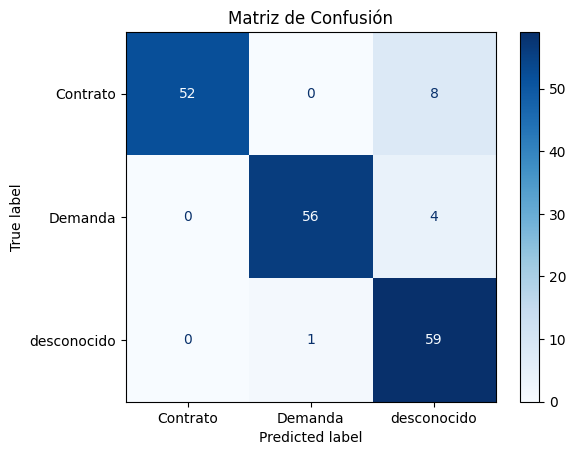


Informe de Clasificación:
              precision    recall  f1-score   support

    contrato       1.00      0.87      0.93        60
     demanda       0.98      0.93      0.96        60
 desconocido       0.83      0.98      0.90        60

    accuracy                           0.93       180
   macro avg       0.94      0.93      0.93       180
weighted avg       0.94      0.93      0.93       180



In [3]:
import pandas as pd
import re
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir las regex
regex_contrato = r"(?i)(convienen en|acuerdan|este contrato|el proveedor|el comprador|el arrendador|el empleado|el prestador|el franquiciante|los socios|la productora|el cedente|el contratista principal|el transportista|el donante|el fiduciario|el licenciante|firmado por las partes|por ambas partes|en virtud de este contrato|según lo estipulado|de acuerdo a este acuerdo|en el marco de este contrato|el acuerdo firmado|las condiciones pactadas|la contraparte|el suscriptor|las partes firmantes|condiciones acordadas|este acuerdo|el convenio|este documento|firma|suscriben|formalizan|se comprometen a|el contrato establece|el acuerdo incluye|se estipula|se pacta|el contrato tiene una duración|el acuerdo tiene un plazo|el contrato se extiende|el acuerdo se renovará|el contrato establece un pago|el acuerdo incluye un pago|las partes se comprometen a|se fija el monto|se establece un precio|la duración del contrato es|se realiza el pago|el pago se hará en|la fecha de inicio es|el acuerdo especifica|el pago se dividirá)"
regex_demanda = r"(?i)(acción legal|demanda|alega|reclama|incumplimiento|conflicto|proceso judicial|negligencia|perjuicio|vicios ocultos|ha llevado el caso a instancias legales|busca reparaciones legales)"

# Función para clasificar documentos
def clasificar_documento(texto):
    if re.search(regex_demanda, texto):
        return "demanda"
    elif re.search(regex_contrato, texto):
        return "contrato"
    else:
        return "desconocido"

# Cargar el archivo CSV
file_path = 'data_ejemplo_5.csv'  # Reemplaza con la ruta de tu archivo CSV
df = pd.read_csv(file_path)

# Clasificar los datos
df['predicted'] = df['data'].apply(clasificar_documento)

# Calcular métricas de clasificación
y_true = df['label']
y_pred = df['predicted']

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred, labels=["contrato", "demanda", "desconocido"])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Contrato", "Demanda", "desconocido"])

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

# Informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_true, y_pred, labels=["contrato", "demanda", "desconocido"]))
